# Exploratory Data Analysis: Ames Housing price dataset

---

## 1. Data Import & Initial Assessment

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('/content/AmesHousing.csv')

print(f"Dataset loaded: {df.shape[0]:,} observations × {df.shape[1]} features")
print(f"Memory footprint: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

Dataset loaded: 2,930 observations × 82 features
Memory footprint: 7.8 MB


In [51]:
# Dataset overview
print("Dataset Structure:")
df.info()

print("\nSample Records:")
display(df.head())

print("\nData Types Summary:")
print(df.dtypes.value_counts().to_dict())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



Data Types Summary:
{dtype('O'): 43, dtype('int64'): 28, dtype('float64'): 11}


In [52]:
df.duplicated().sum()

np.int64(0)

## 2. Data Quality Assessment

In [53]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df) * 100).round(2)

quality_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct,
    'Data_Type': df.dtypes
})

# Filter and display problematic columns
issues = quality_summary[quality_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(issues) > 0:
    print("Data Quality Issues:")
    display(issues)

    # Visualization for missing data
    if len(issues) <= 10:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=issues.reset_index(), y='index', x='Missing_Percentage', orient='h')
        plt.title('Missing Data Analysis')
        plt.xlabel('Missing Data (%)')
        plt.tight_layout()
        plt.show()
else:
    print("✅ Data quality check passed - no missing values detected")

Data Quality Issues:


,Missing_Count,Missing_Percentage,Data_Type
Pool QC,2917,99.56,object
Misc Feature,2824,96.38,object
Alley,2732,93.24,object
Fence,2358,80.48,object
Mas Vnr Type,1775,60.58,object
Fireplace Qu,1422,48.53,object
Lot Frontage,490,16.72,float64
Garage Qual,159,5.43,object
Garage Cond,159,5.43,object
Garage Yr Blt,159,5.43,float64



Missing Data in Categorical Features:


,Missing_Count,Missing_Percentage,Data_Type
Pool QC,2917,99.56,object
Misc Feature,2824,96.38,object
Alley,2732,93.24,object
Fence,2358,80.48,object
Mas Vnr Type,1775,60.58,object
Fireplace Qu,1422,48.53,object
Garage Qual,159,5.43,object
Garage Cond,159,5.43,object
Garage Finish,159,5.43,object
Garage Type,157,5.36,object


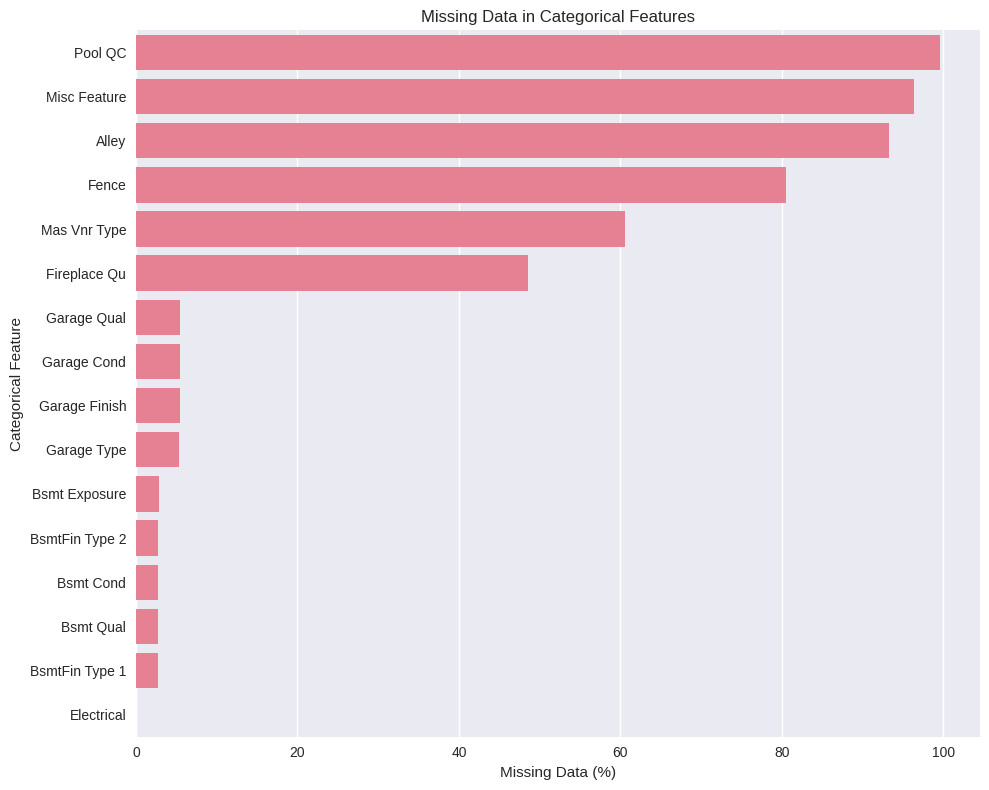

In [54]:
import matplotlib.pyplot as plt
# Select categorical columns (excluding the target variable if applicable)
categorical_cols = df.select_dtypes(include='object').columns

# Filter the issues to include only categorical columns with missing values
categorical_issues = issues[issues['Data_Type'] == 'object']

if len(categorical_issues) > 0:
    print("\nMissing Data in Categorical Features:")
    display(categorical_issues)

    # Visualization for missing data in categorical features
    plt.figure(figsize=(10, min(len(categorical_issues) * 0.5, 8))) # Adjust figure height dynamically
    sns.barplot(data=categorical_issues.reset_index(), y='index', x='Missing_Percentage', orient='h')
    plt.title('Missing Data in Categorical Features')
    plt.xlabel('Missing Data (%)')
    plt.ylabel('Categorical Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values in categorical features detected")


Missing Data in Numerical Features:


,Missing_Count,Missing_Percentage,Data_Type
Lot Frontage,490,16.72,float64
Garage Yr Blt,159,5.43,float64
Mas Vnr Area,23,0.78,float64
Bsmt Half Bath,2,0.07,float64
Bsmt Full Bath,2,0.07,float64
BsmtFin SF 1,1,0.03,float64
BsmtFin SF 2,1,0.03,float64
Total Bsmt SF,1,0.03,float64
Bsmt Unf SF,1,0.03,float64
Garage Cars,1,0.03,float64


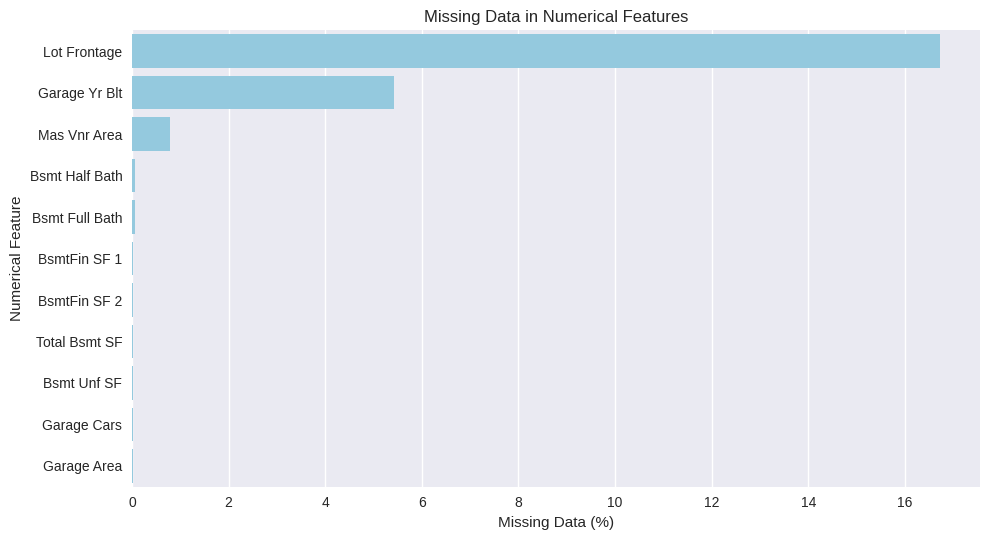

In [55]:
# prompt: make visualizations about the missing values for categorical

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Check missing values for numerical columns
numerical_missing_data = df[numerical_cols].isnull().sum()
numerical_missing_pct = (numerical_missing_data / len(df) * 100).round(2)
numerical_missing_summary = pd.DataFrame({
    'Missing_Count': numerical_missing_data,
    'Missing_Percentage': numerical_missing_pct,
    'Data_Type': df[numerical_cols].dtypes
})
numerical_issues = numerical_missing_summary[numerical_missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(numerical_issues) > 0:
    print("\nMissing Data in Numerical Features:")
    display(numerical_issues)

    # Visualization for missing data in numerical features
    plt.figure(figsize=(10, min(len(numerical_issues) * 0.5, 8)))
    sns.barplot(data=numerical_issues.reset_index(), y='index', x='Missing_Percentage', orient='h', color='skyblue')
    plt.title('Missing Data in Numerical Features')
    plt.xlabel('Missing Data (%)')
    plt.ylabel('Numerical Feature')
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values in numerical features detected")

In [56]:
columns_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type', 'Fireplace Qu']
df_dropped = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df_dropped.head())
print(f"\nShape after dropping columns: {df_dropped.shape[0]:,} observations × {df_dropped.shape[1]} features")

DataFrame after dropping columns:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2       IR1          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...              0          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0       

In [57]:
import numpy as np
# Impute missing numerical values with the median
numerical_cols = df_dropped.select_dtypes(include=np.number).columns
for col in numerical_cols:
  if df_dropped[col].isnull().any():
    median_val = df_dropped[col].median()
    df_dropped[col].fillna(median_val, inplace=True)

print("\nDataFrame after imputing numerical NaNs with median:")
display(df_dropped.head())
print(f"\nShape after imputation: {df_dropped.shape[0]:,} observations × {df_dropped.shape[1]} features")

# Verify no more missing numerical values
missing_data_after_num_impute = df_dropped.select_dtypes(include=np.number).isnull().sum()
print("\nMissing numerical values after imputation:")
print(missing_data_after_num_impute[missing_data_after_num_impute > 0])


DataFrame after imputing numerical NaNs with median:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900



Shape after imputation: 2,930 observations × 76 features

Missing numerical values after imputation:
Series([], dtype: int64)


In [58]:
# Impute missing categorical values with the mode
categorical_cols = df_dropped.select_dtypes(include='object').columns
for col in categorical_cols:
  if df_dropped[col].isnull().any():
    mode_val = df_dropped[col].mode()[0] # mode() returns a Series, take the first element
    df_dropped[col].fillna(mode_val, inplace=True)

print("\nDataFrame after imputing categorical NaNs with mode:")
display(df_dropped.head())
print(f"\nShape after imputation: {df_dropped.shape[0]:,} observations × {df_dropped.shape[1]} features")

# Verify no more missing categorical values
missing_data_after_cat_impute = df_dropped.select_dtypes(include='object').isnull().sum()
print("\nMissing categorical values after imputation:")
print(missing_data_after_cat_impute[missing_data_after_cat_impute > 0])

# Final check for any remaining missing values
final_missing_data = df_dropped.isnull().sum()
print("\nFinal check for any missing values:")
print(final_missing_data[final_missing_data > 0])


DataFrame after imputing categorical NaNs with mode:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900



Shape after imputation: 2,930 observations × 76 features

Missing categorical values after imputation:
Series([], dtype: int64)

Final check for any missing values:
Series([], dtype: int64)


In [59]:
display(df.head())

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [60]:
# prompt: check for duplicates

num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
  print("Dropping duplicate rows...")
  df = df.drop_duplicates()
  print(f"Shape after dropping duplicates: {df.shape[0]:,} observations × {df.shape[1]} features")
else:
  print("✅ No duplicate rows found.")


Number of duplicate rows: 0
✅ No duplicate rows found.


In [61]:
# prompt: ensure data type corresction

# Correct data types for specific columns based on data dictionary or domain knowledge

# Example: Some columns might be represented as numbers but are actually categories.
# Based on the Ames Housing data description:
# 'MSSubClass' is a categorical variable (Dwelling type)
# 'Overall Qual', 'Overall Cond' are ordinal categories, but often treated as numerical
# 'Yr Sold', 'Mo Sold' are related to time, but can be treated as categories if not used for time series analysis

# Let's treat 'MSSubClass', 'Yr Sold', 'Mo Sold' as categorical
cols_to_convert_to_category = ['MSSubClass', 'Yr Sold', 'Mo Sold']

for col in cols_to_convert_to_category:
    if col in df_dropped.columns: # Use df_dropped as this is the processed dataframe
        df_dropped[col] = df_dropped[col].astype('category')

# Verify the changes
print("\nData types after type correction:")
print(df_dropped.dtypes.value_counts().to_dict())
print("\nSample data after type correction:")
display(df_dropped.head())


Data types after type correction:
{dtype('O'): 37, dtype('int64'): 26, dtype('float64'): 11, CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False, categories_dtype=int64): 1, CategoricalDtype(categories=[2006, 2007, 2008, 2009, 2010], ordered=False, categories_dtype=int64): 1}

Sample data after type correction:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [67]:
# Now, the 'df' variable is updated with the cleaned dataframe.
# You can rename df_dropped back to df if you prefer.
df = df_dropped

print("\nDataset updated with the cleaned version (df_dropped renamed to df).")
print(f"Updated dataset shape: {df.shape[0]:,} observations × {df.shape[1]} features")
print("\nUpdated Data Types Summary:")
print(df.dtypes.value_counts().to_dict())
print("\nUpdated Sample Records:")
display(df.head())


Dataset updated with the cleaned version (df_dropped renamed to df).
Updated dataset shape: 2,930 observations × 76 features

Updated Data Types Summary:
{dtype('O'): 37, dtype('int64'): 26, dtype('float64'): 11, CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False, categories_dtype=int64): 1, CategoricalDtype(categories=[2006, 2007, 2008, 2009, 2010], ordered=False, categories_dtype=int64): 1}

Updated Sample Records:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


## 3. Variable Classification & Summary Statistics

In [69]:
# Classify variables by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Variable Classification:")
print(f"• Numeric: {len(numeric_cols)} variables")
print(f"• Categorical: {len(categorical_cols)} variables")
print(f"• DateTime: {len(datetime_cols)} variables")

# Summary statistics for numeric variables
if numeric_cols:
    print("\nDescriptive Statistics (Numeric Variables):")
    display(df[numeric_cols].describe().round(2))

Variable Classification:
• Numeric: 37 variables
• Categorical: 39 variables
• DateTime: 0 variables

Descriptive Statistics (Numeric Variables):


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
count,2930.00,2.930000e+03,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,...,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,7.144645e+08,57.39,69.02,10147.92,6.09,5.56,1971.36,1984.27,101.10,...,1.77,472.82,93.75,47.53,23.01,2.59,16.00,2.24,50.64,180796.06
std,845.96,1.887308e+08,42.64,21.33,7880.02,1.41,1.11,30.25,20.86,178.63,...,0.76,215.01,126.36,67.48,64.14,25.14,56.09,35.60,566.34,79886.69
min,1.00,5.263011e+08,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12789.00
25%,733.25,5.284770e+08,20.00,60.00,7440.25,5.00,5.00,1954.00,1965.00,0.00,...,1.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,129500.00
50%,1465.50,5.354536e+08,50.00,68.00,9436.50,6.00,5.00,1973.00,1993.00,0.00,...,2.00,480.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,160000.00
75%,2197.75,9.071811e+08,70.00,78.00,11555.25,7.00,6.00,2001.00,2004.00,162.75,...,2.00,576.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,213500.00
max,2930.00,1.007100e+09,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,...,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,755000.00


In [71]:
import pandas as pd
import numpy as np
# Separate different types of variables based on refined classification
# (Numerical, Categorical - Nominal, Categorical - Ordinal, maybe Datetime/Time-based if applicable)

# Re-classify based on domain knowledge or data dictionary if available
# For Ames Housing, common classifications are:
# - Numerical (continuous/discrete): Lot Frontage, Lot Area, Year Built, 1st Flr SF, Gr Liv Area, SalePrice etc.
# - Ordinal Categorical: Lot Shape, Utilities, Land Slope, Overall Qual, Overall Cond, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, HeatingQC, KitchenQual, Fireplace Qu, Garage Qual, Garage Cond, Pool QC, Fence etc. (These have a clear order)
# - Nominal Categorical: MS Zoning, Street, Alley, Land Contour, Neighborhood, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Foundation, Heating, Central Air, Electrical, Functional, Garage Type, Garage Finish, Paved Drive, Misc Feature, Sale Type, Sale Condition etc. (No inherent order)

# Given the previous steps dropped some columns and converted some to 'category',
# we need to refine based on the *current* state of the 'df' dataframe.

# Let's manually define based on Ames Housing data description, considering the dropped columns
# and the columns converted to 'category' ('MSSubClass', 'Yr Sold', 'Mo Sold').

# Re-fetch current column lists
current_cols = df.columns.tolist()
numeric_cols_current = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols_current = df.select_dtypes(include='category').columns.tolist() # Use 'category' type

# Nominal Categorical Columns (based on data description, excluding dropped ones)
nominal_cols = [
    'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
    'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating', 'Central Air',
    'Electrical', 'Garage Type', 'Sale Type', 'Sale Condition'
]
# Filter for columns that still exist in the dataframe
nominal_cols = [col for col in nominal_cols if col in current_cols]

# Ordinal Categorical Columns (based on data description, excluding dropped ones)
ordinal_cols = [
    'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond',
    'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2', 'HeatingQC', 'Kitchen Qual',
    'Functional', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive'
]
# Filter for columns that still exist in the dataframe
ordinal_cols = [col for col in ordinal_cols if col in current_cols]

# Variables we converted to 'category' but might be ordinal or nominal depending on interpretation
# 'MSSubClass' is nominal (Dwelling type)
# 'Yr Sold', 'Mo Sold' could be treated as nominal categories for grouping/analysis purposes
nominal_cols.extend(['MSSubClass', 'Yr Sold', 'Mo Sold'])

# Remove columns that were manually classified as nominal or ordinal from the generic numeric/categorical lists
# This ensures no overlap and correct classification
numeric_cols_refined = [col for col in numeric_cols_current if col not in ordinal_cols]
categorical_cols_nominal_refined = [col for col in nominal_cols if col in categorical_cols_current]
categorical_cols_ordinal_refined = [col for col in ordinal_cols if col in categorical_cols_current]

# Check for any columns missed in the manual classification (should ideally be empty)
all_classified_cols = set(numeric_cols_refined + categorical_cols_nominal_refined + categorical_cols_ordinal_refined)
unclassified_cols = [col for col in current_cols if col not in all_classified_cols]

print("\nRefined Variable Classification:")
print(f"• Numeric: {len(numeric_cols_refined)} variables - {numeric_cols_refined}")
print(f"• Categorical (Nominal): {len(categorical_cols_nominal_refined)} variables - {categorical_cols_nominal_refined}")
print(f"• Categorical (Ordinal): {len(categorical_cols_ordinal_refined)} variables - {categorical_cols_ordinal_refined}")
if unclassified_cols:
    print(f"• Unclassified (check these!): {len(unclassified_cols)} variables - {unclassified_cols}")

# Summary statistics for numerical variables (refined list)
if numeric_cols_refined:
    print("\nDescriptive Statistics (Numeric Variables - Refined):")
    display(df[numeric_cols_refined].describe().round(2))

# Summary statistics for categorical variables (refined lists)
if categorical_cols_nominal_refined:
    print("\nValue Counts (Nominal Categorical Variables - Refined):")
    # Display value counts for a few example nominal columns
    for col in categorical_cols_nominal_refined[:5]: # Displaying first 5 for brevity
        print(f"\n--- {col} ---")
        print(df[col].value_counts())

if categorical_cols_ordinal_refined:
    print("\nValue Counts (Ordinal Categorical Variables - Refined):")
    # Display value counts for a few example ordinal columns
    for col in categorical_cols_ordinal_refined[:5]: # Displaying first 5 for brevity
        print(f"\n--- {col} ---")
        print(df[col].value_counts())

# Note: For ordinal variables, you might want to define and use explicit ordering
# with pd.CategoricalDtype if you plan to use them in models that can leverage order.
# Example:
# order_LotShape = ['IR3', 'IR2', 'IR1', 'Reg']
# df['Lot Shape'] = df['Lot Shape'].astype(pd.CategoricalDtype(categories=order_LotShape, ordered=True))


Refined Variable Classification:
• Numeric: 35 variables - ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
• Categorical (Nominal): 2 variables - ['Yr Sold', 'Mo Sold']
• Categorical (Ordinal): 0 variables - []
• Unclassified (check these!): 39 variables - ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Ext

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
count,2930.00,2.930000e+03,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,...,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,7.144645e+08,57.39,69.02,10147.92,1971.36,1984.27,101.10,442.60,49.71,...,1.77,472.82,93.75,47.53,23.01,2.59,16.00,2.24,50.64,180796.06
std,845.96,1.887308e+08,42.64,21.33,7880.02,30.25,20.86,178.63,455.52,169.14,...,0.76,215.01,126.36,67.48,64.14,25.14,56.09,35.60,566.34,79886.69
min,1.00,5.263011e+08,20.00,21.00,1300.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12789.00
25%,733.25,5.284770e+08,20.00,60.00,7440.25,1954.00,1965.00,0.00,0.00,0.00,...,1.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,129500.00
50%,1465.50,5.354536e+08,50.00,68.00,9436.50,1973.00,1993.00,0.00,370.00,0.00,...,2.00,480.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,160000.00
75%,2197.75,9.071811e+08,70.00,78.00,11555.25,2001.00,2004.00,162.75,734.00,0.00,...,2.00,576.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,213500.00
max,2930.00,1.007100e+09,190.00,313.00,215245.00,2010.00,2010.00,1600.00,5644.00,1526.00,...,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,755000.00



Value Counts (Nominal Categorical Variables - Refined):

--- Yr Sold ---
Yr Sold
2007    694
2009    648
2006    625
2008    622
2010    341
Name: count, dtype: int64

--- Mo Sold ---
Mo Sold
6     505
7     449
5     395
4     279
8     233
3     232
10    173
9     161
11    143
2     133
1     123
12    104
Name: count, dtype: int64


In [72]:
# Summary statistics for categorical variables (refined lists)
if categorical_cols_nominal_refined:
    print("\nSummary Statistics (Nominal Categorical Variables - Refined):")
    display(df[categorical_cols_nominal_refined].describe())

if categorical_cols_ordinal_refined:
    print("\nSummary Statistics (Ordinal Categorical Variables - Refined):")
    display(df[categorical_cols_ordinal_refined].describe())


Summary Statistics (Nominal Categorical Variables - Refined):


,Yr Sold,Mo Sold
count,2930,2930
unique,5,12
top,2007,6
freq,694,505


In [73]:
# Calculate skewness for numeric variables
if numeric_cols_refined:
    print("\nSkewness (Numeric Variables - Refined):")
    skewness = df[numeric_cols_refined].skew().sort_values(ascending=False)
    display(skewness)


Skewness (Numeric Variables - Refined):


,0
Misc Val,21.999788
Pool Area,16.939142
Lot Area,12.820898
Low Qual Fin SF,12.118162
3Ssn Porch,11.403795
Kitchen AbvGr,4.313825
BsmtFin SF 2,4.140794
Enclosed Porch,4.014446
Screen Porch,3.957467
Bsmt Half Bath,3.942389


In [74]:
import pandas as pd
# Assuming 'Year Built', 'Year Remod/Add', 'Yr Sold' are the relevant year columns to consider as datetime-like
# Convert year columns to datetime objects if they aren't already, to facilitate date range summary
# Note: These are years, not full datetimes, but we can treat them as such for min/max year
year_cols = ['Year Built', 'Year Remod/Add', 'Yr Sold']

print("\nSummarizing Date Ranges (Year Columns):")

for col in year_cols:
    if col in df.columns:
        # Convert to numeric if they are currently objects or categories
        if df[col].dtype in ['object', 'category']:
             # Attempt to convert to numeric, coercing errors
             df[col] = pd.to_numeric(df[col], errors='coerce')

        if pd.api.types.is_numeric_dtype(df[col]):
            # Drop NaNs before finding min/max year
            valid_years = df[col].dropna()
            if not valid_years.empty:
                min_year = int(valid_years.min())
                max_year = int(valid_years.max())
                print(f"• {col}: Range from {min_year} to {max_year}")
            else:
                print(f"• {col}: No valid year data found.")
        else:
            print(f"• {col}: Column is not numeric and cannot be summarized as a date range.")
    else:
        print(f"• {col}: Column not found in the dataframe.")


Summarizing Date Ranges (Year Columns):
• Year Built: Range from 1872 to 2010
• Year Remod/Add: Range from 1950 to 2010
• Yr Sold: Range from 2006 to 2010



Visualizing Value Counts for Top Nominal Categorical Variables:


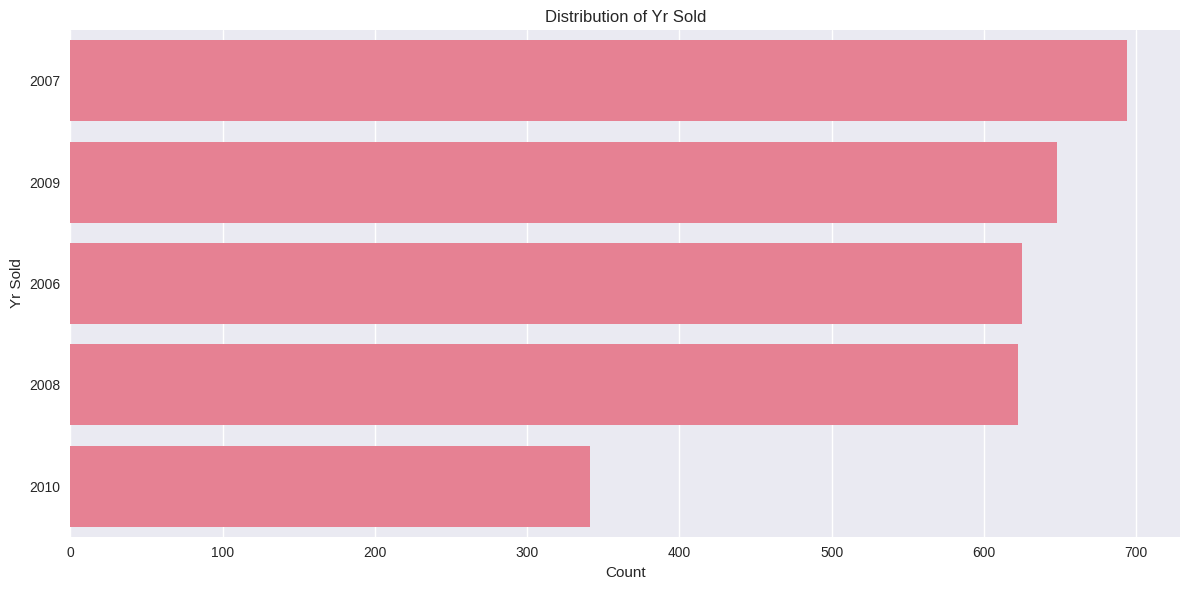

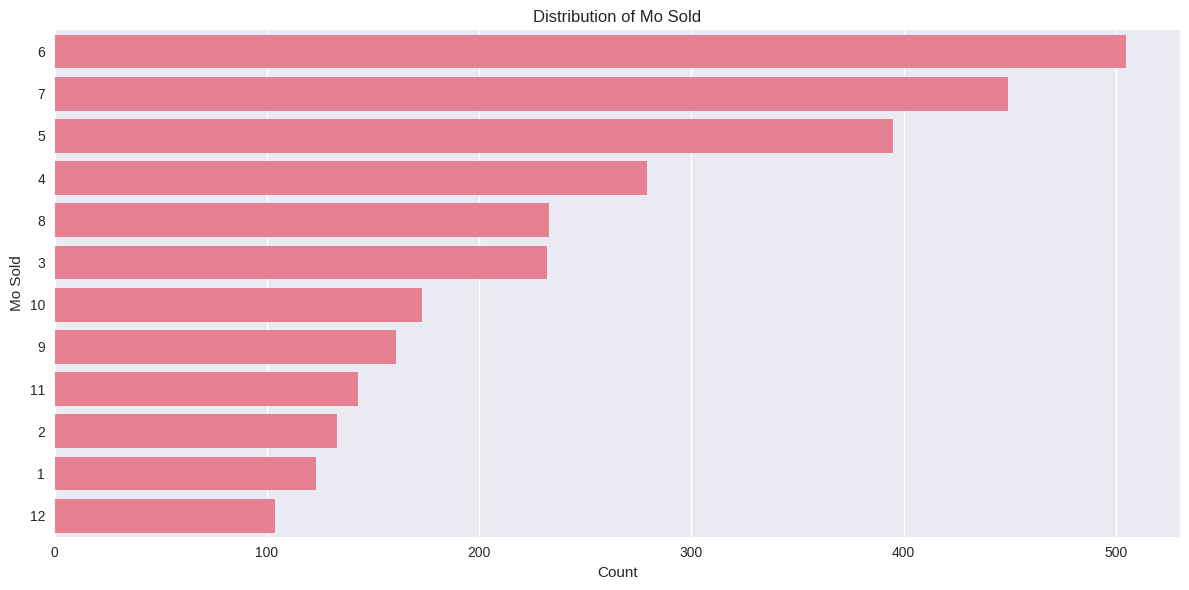

In [75]:
import matplotlib.pyplot as plt
# Add a quick visualization for categorical variable counts
print("\nVisualizing Value Counts for Top Nominal Categorical Variables:")

# Select top N nominal columns based on number of unique values (or another criteria)
# Let's choose columns with a moderate number of unique values for visualization
nominal_cols_to_viz = [col for col in categorical_cols_nominal_refined if df[col].nunique() < 50] # Avoid plotting columns with too many categories

# Limit the number of plots to avoid excessive output
max_plots = 6

for i, col in enumerate(nominal_cols_to_viz[:max_plots]):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## 4. Univariate Analysis

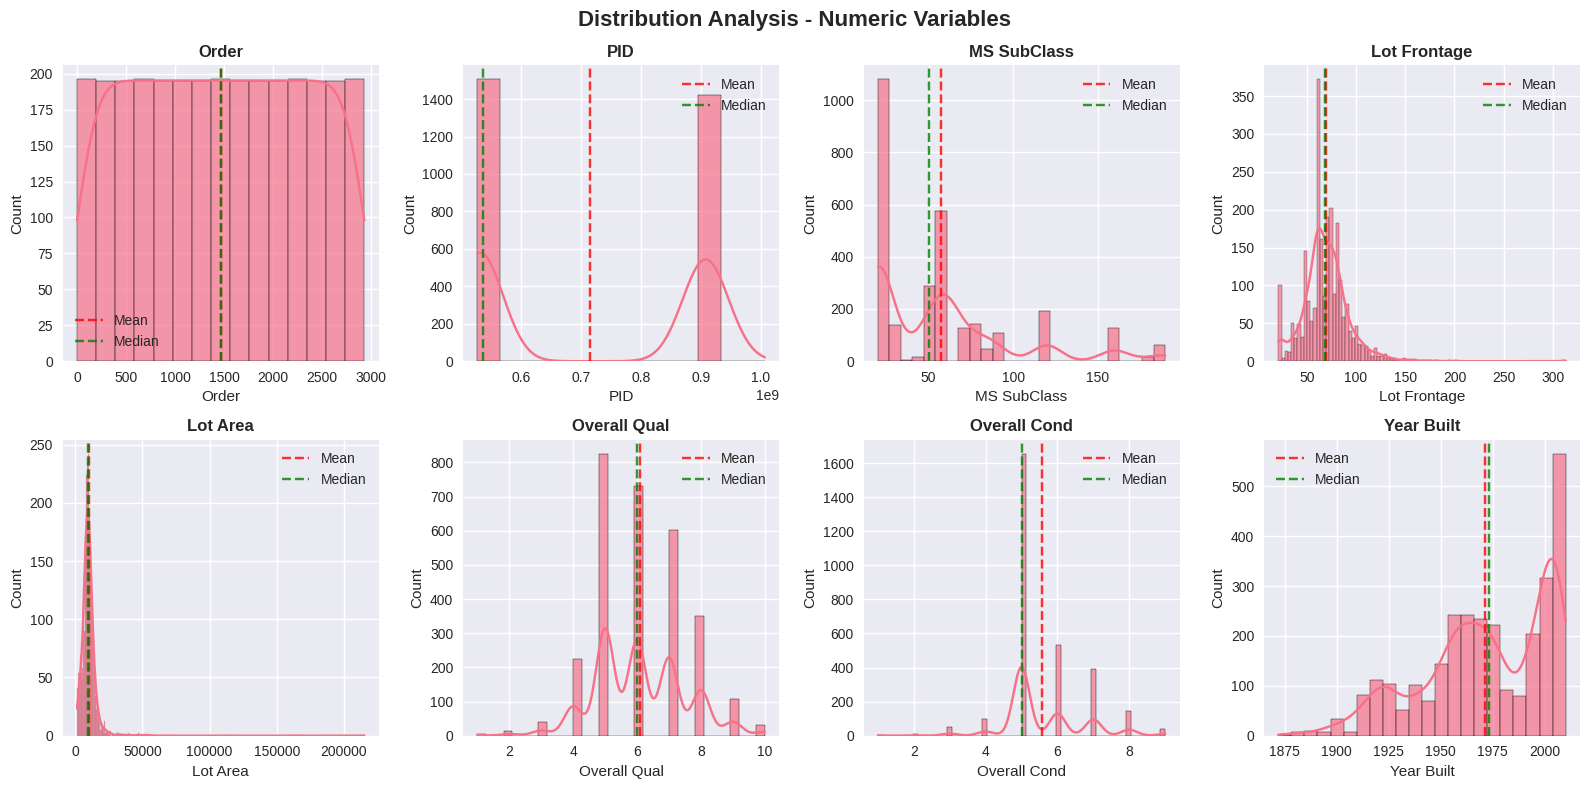

In [63]:
# Numeric variable distributions
if numeric_cols:
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols[:8]) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if len(numeric_cols) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:8]):
        sns.histplot(df[col], kde=True, ax=axes[i], alpha=0.7)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.8, label='Mean')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.8, label='Median')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].legend()

    # Hide unused subplots
    for i in range(len(numeric_cols[:8]), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

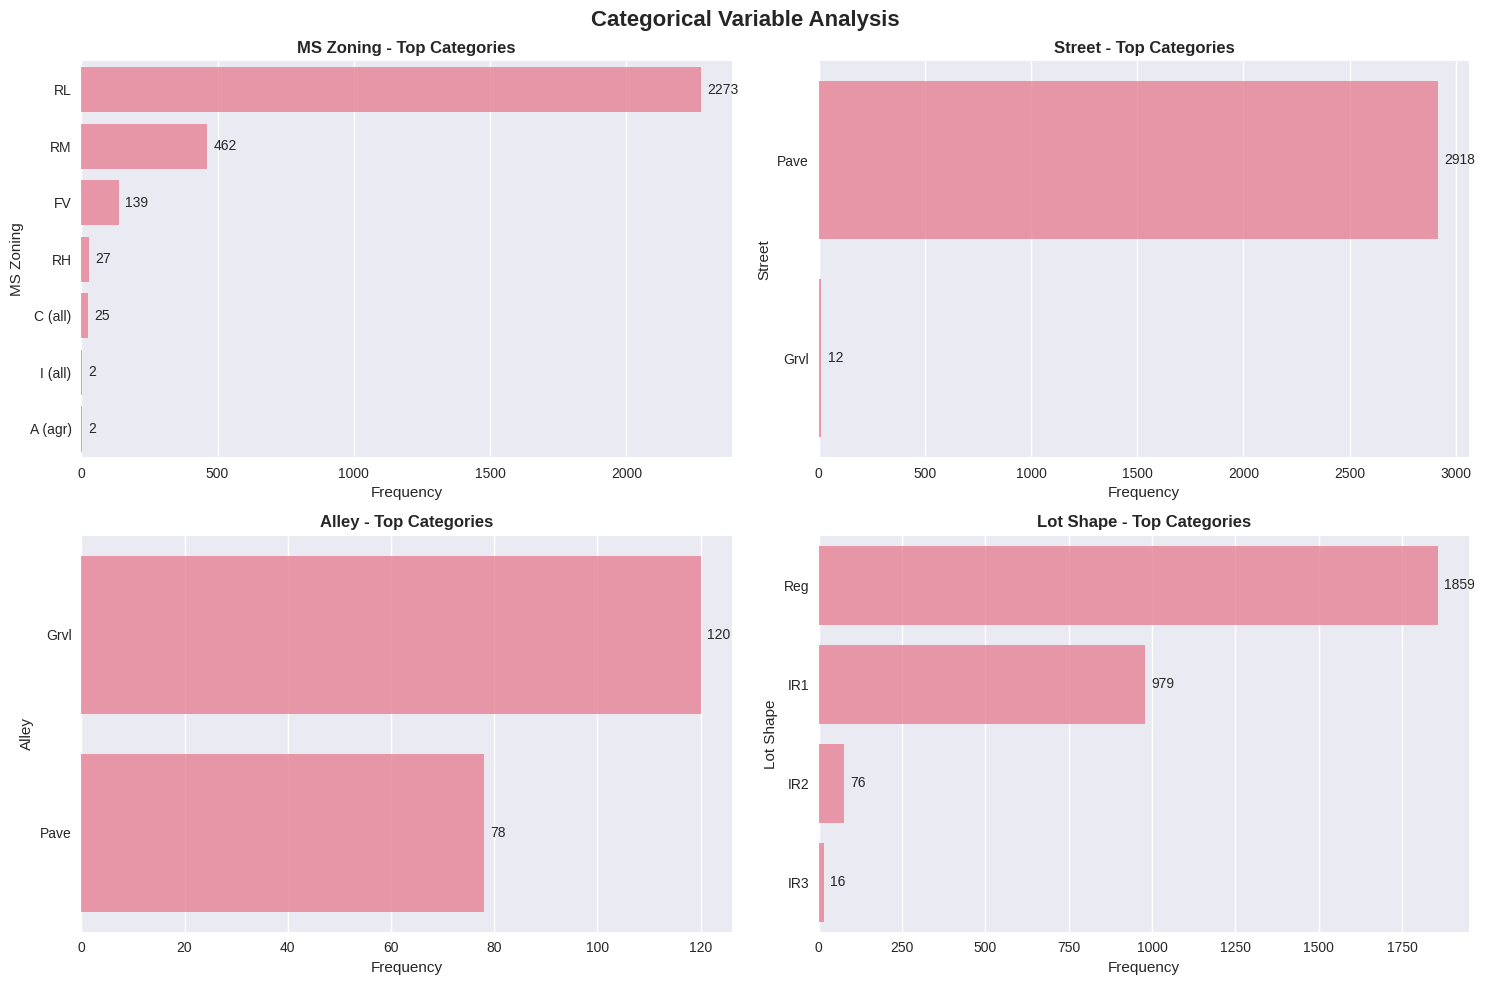

In [64]:
# Categorical variable analysis
if categorical_cols:
    n_vars = min(4, len(categorical_cols))
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols[:n_vars]):
        top_categories = df[col].value_counts().head(8)
        sns.barplot(y=top_categories.index, x=top_categories.values, ax=axes[i], alpha=0.8)
        axes[i].set_title(f'{col} - Top Categories', fontweight='bold')
        axes[i].set_xlabel('Frequency')

        # Add value labels
        for j, v in enumerate(top_categories.values):
            axes[i].text(v + max(top_categories.values)*0.01, j, str(v), va='center')

    # Hide unused subplots
    for i in range(n_vars, 4):
        axes[i].axis('off')

    plt.suptitle('Categorical Variable Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [78]:
import matplotlib.pyplot as plt
# Calculate skewness and kurtosis for numeric variables
if numeric_cols_refined:
    print("\nSkewness (Numeric Variables - Refined):")
    skewness = df[numeric_cols_refined].skew().sort_values(ascending=False)
    display(skewness)

    print("\nKurtosis (Numeric Variables - Refined):")
    kurtosis = df[numeric_cols_refined].kurtosis().sort_values(ascending=False)
    display(kurtosis)

# Identify specific variables with high skew or kurtosis for further investigation
skewness_threshold = 0.75 # Common threshold
kurtosis_threshold = 3 # Kurtosis > 3 indicates leptokurtic (heavy tails)

highly_skewed = skewness[(abs(skewness) > skewness_threshold) & (skewness.index != 'SalePrice')] # Exclude SalePrice if it's the target
highly_kurtotic = kurtosis[abs(kurtosis) > kurtosis_threshold]

if not highly_skewed.empty:
    print(f"\nNumeric variables with |skewness| > {skewness_threshold} (excluding SalePrice):")
    display(highly_skewed)

if not highly_kurtotic.empty:
    print(f"\nNumeric variables with |kurtosis| > {kurtosis_threshold}:")
    display(highly_kurtotic)

# For the target variable (assuming 'SalePrice' based on the example), specifically print its skewness and kurtosis
if 'SalePrice' in df.columns:
    print(f"\nSkewness of SalePrice: {df['SalePrice'].skew():.4f}")
    print(f"Kurtosis of SalePrice: {df['SalePrice'].kurtosis():.4f}")




Skewness (Numeric Variables - Refined):


,0
Misc Val,21.999788
Pool Area,16.939142
Lot Area,12.820898
Low Qual Fin SF,12.118162
3Ssn Porch,11.403795
Kitchen AbvGr,4.313825
BsmtFin SF 2,4.140794
Enclosed Porch,4.014446
Screen Porch,3.957467
Bsmt Half Bath,3.942389



Kurtosis (Numeric Variables - Refined):


,0
Misc Val,566.203298
Pool Area,299.774944
Lot Area,265.023671
Low Qual Fin SF,175.606950
3Ssn Porch,149.988701
Enclosed Porch,28.487205
Kitchen AbvGr,19.869743
BsmtFin SF 2,18.789288
Screen Porch,17.859150
Bsmt Half Bath,14.935133



Numeric variables with |skewness| > 0.75 (excluding SalePrice):


,0
Misc Val,21.999788
Pool Area,16.939142
Lot Area,12.820898
Low Qual Fin SF,12.118162
3Ssn Porch,11.403795
Kitchen AbvGr,4.313825
BsmtFin SF 2,4.140794
Enclosed Porch,4.014446
Screen Porch,3.957467
Bsmt Half Bath,3.942389



Numeric variables with |kurtosis| > 3:


,0
Misc Val,566.203298
Pool Area,299.774944
Lot Area,265.023671
Low Qual Fin SF,175.606950
3Ssn Porch,149.988701
Enclosed Porch,28.487205
Kitchen AbvGr,19.869743
BsmtFin SF 2,18.789288
Screen Porch,17.859150
Bsmt Half Bath,14.935133



Skewness of SalePrice: 1.7435
Kurtosis of SalePrice: 5.1189


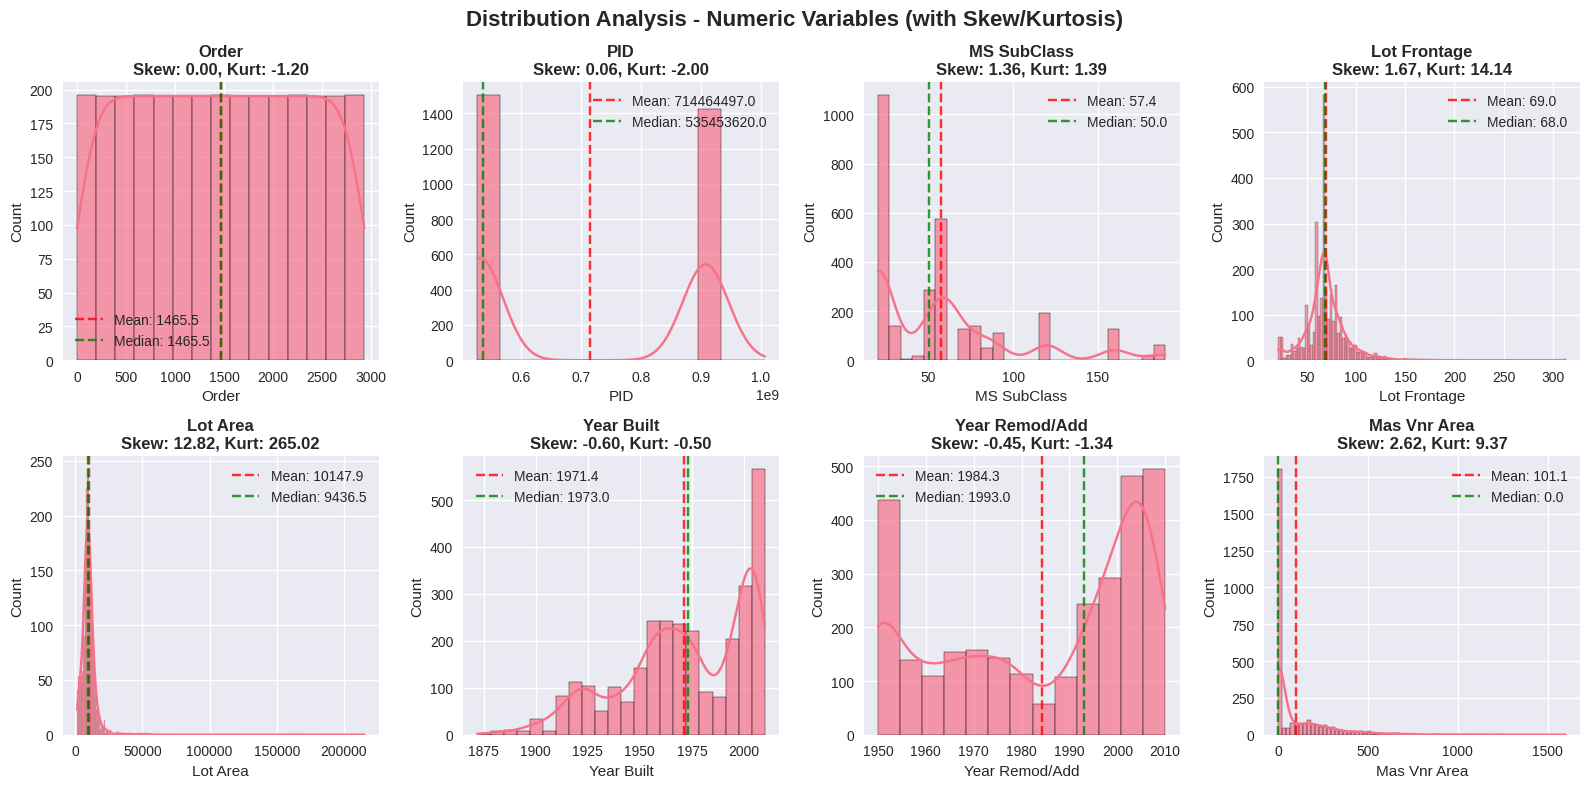

In [77]:
# Example modification for the histogram loop (only plotting the first 8 as in the original code)
if numeric_cols_refined:
    n_cols = min(4, len(numeric_cols_refined))
    n_rows = (len(numeric_cols_refined[:8]) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if len(numeric_cols_refined[:8]) == 1: # Handle case with only one plot
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols_refined[:8]):
        sns.histplot(df[col], kde=True, ax=axes[i], alpha=0.7)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: {df[col].mean():.1f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.8, label=f'Median: {df[col].median():.1f}')

        # Add skewness and kurtosis to the title or as text annotation
        col_skew = df[col].skew()
        col_kurtosis = df[col].kurtosis()
        axes[i].set_title(f'{col}\nSkew: {col_skew:.2f}, Kurt: {col_kurtosis:.2f}', fontweight='bold')
        axes[i].legend()

    # Hide unused subplots
    for i in range(len(numeric_cols_refined[:8]), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Numeric Variables (with Skew/Kurtosis)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


Visualizing Outliers with Box Plots:


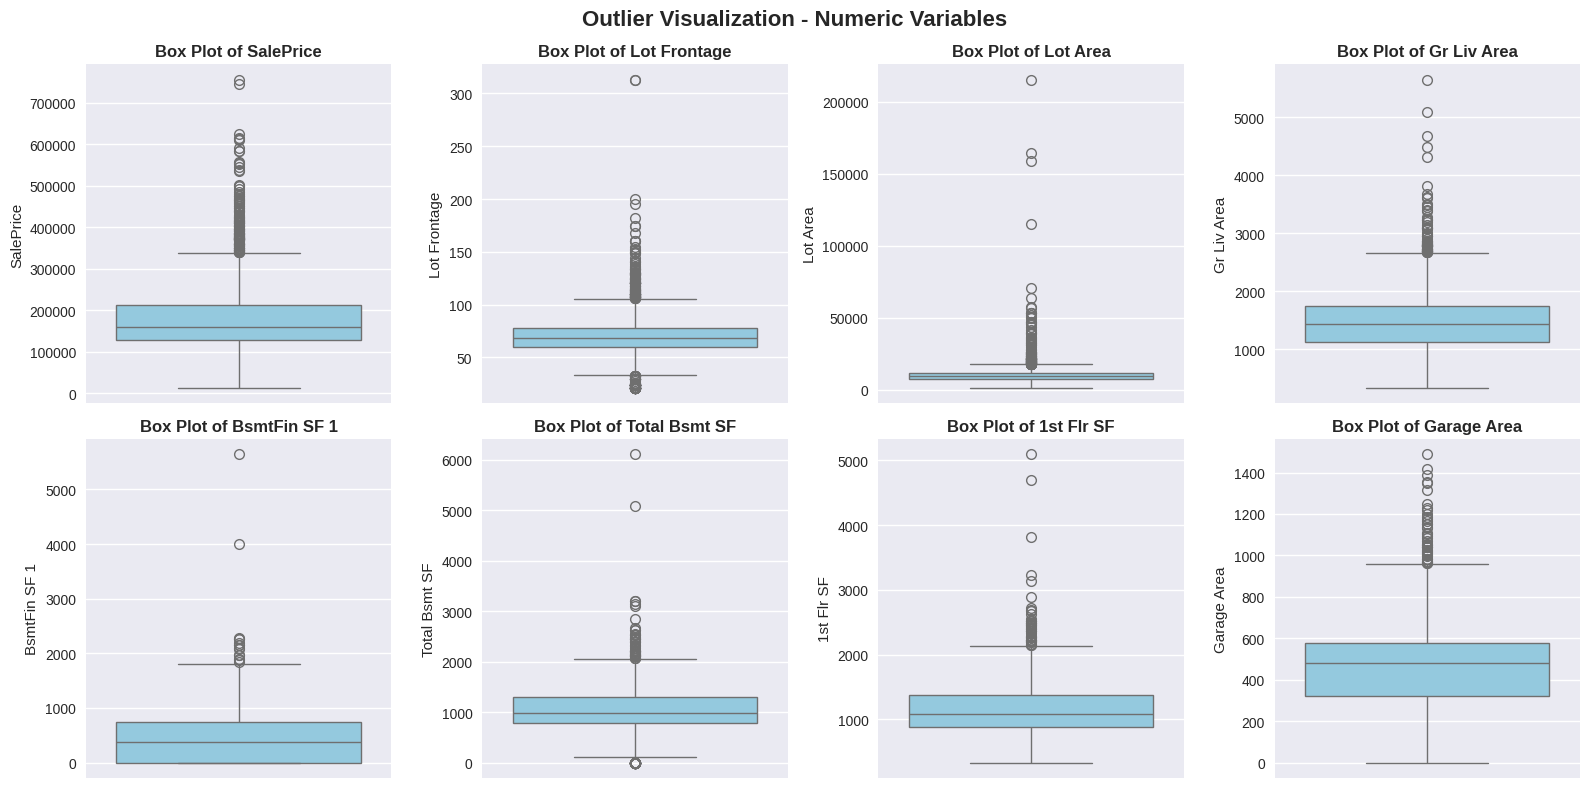

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
# Add box plots for selected numeric variables to visualize outliers
print("\nVisualizing Outliers with Box Plots:")

# Select a few key numerical variables likely to have outliers
# 'SalePrice', 'Lot Frontage', 'Lot Area', 'Gr Liv Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Garage Area' are good candidates
outlier_vars = ['SalePrice', 'Lot Frontage', 'Lot Area', 'Gr Liv Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Garage Area']
outlier_vars = [col for col in outlier_vars if col in df.columns and pd.api.types.is_numeric_dtype(df[col])] # Ensure columns exist and are numeric

if outlier_vars:
    n_cols = min(4, len(outlier_vars))
    n_rows = (len(outlier_vars) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    if len(outlier_vars) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for i, col in enumerate(outlier_vars):
        sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Box Plot of {col}', fontweight='bold')
        axes[i].set_ylabel(col)

    # Hide unused subplots
    for i in range(len(outlier_vars), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Outlier Visualization - Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No relevant numerical variables found to plot box plots for outlier detection.")


Distribution Analysis - Top Numeric Variables (Histograms with KDE):


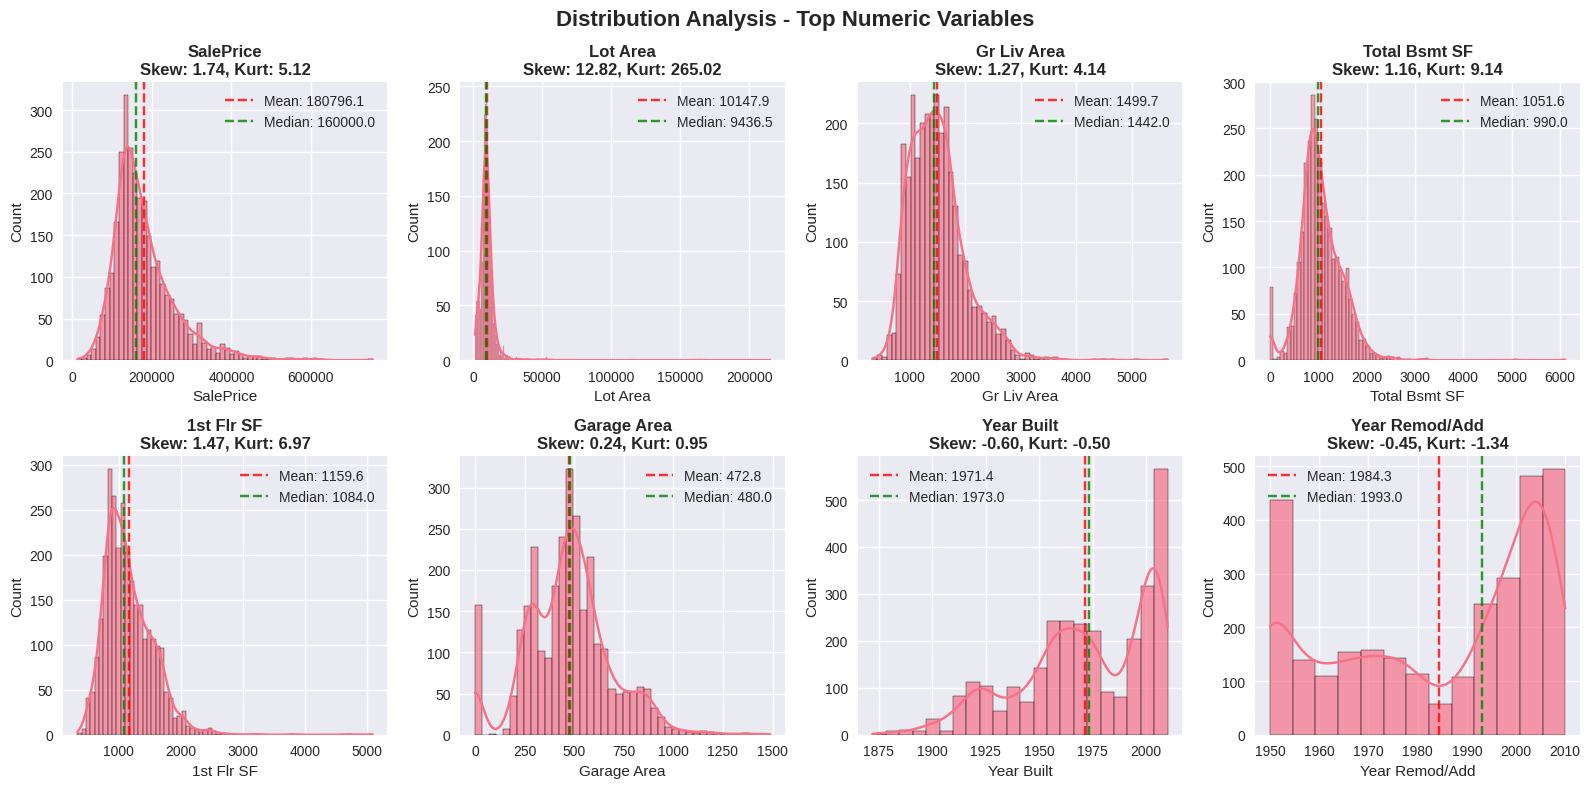

In [80]:
# Define the top numeric columns to plot histograms for
top_numeric_cols_for_hist = ['SalePrice', 'Lot Area', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Year Built', 'Year Remod/Add']

# Filter the list to only include columns that are in the dataframe and are numeric
numeric_cols_to_plot = [col for col in top_numeric_cols_for_hist if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if numeric_cols_to_plot:
    print("\nDistribution Analysis - Top Numeric Variables (Histograms with KDE):")
    n_cols = min(4, len(numeric_cols_to_plot))
    n_rows = (len(numeric_cols_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if len(numeric_cols_to_plot) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols_to_plot):
        sns.histplot(df[col], kde=True, ax=axes[i], alpha=0.7)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: {df[col].mean():.1f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.8, label=f'Median: {df[col].median():.1f}')

        # Add skewness and kurtosis to the title or as text annotation if previously calculated and stored
        # (Assuming skewness and kurtosis were calculated for these columns earlier)
        try:
            col_skew = df[col].skew()
            col_kurtosis = df[col].kurtosis()
            axes[i].set_title(f'{col}\nSkew: {col_skew:.2f}, Kurt: {col_kurtosis:.2f}', fontweight='bold')
        except:
             axes[i].set_title(f'{col}', fontweight='bold') # Fallback title

        axes[i].legend()

    # Hide unused subplots
    for i in range(len(numeric_cols_to_plot), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Top Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No relevant numeric columns found among the selected top 8 for plotting histograms.")


Visualizing Value Counts for Key Categorical Variables (Bar Plots):


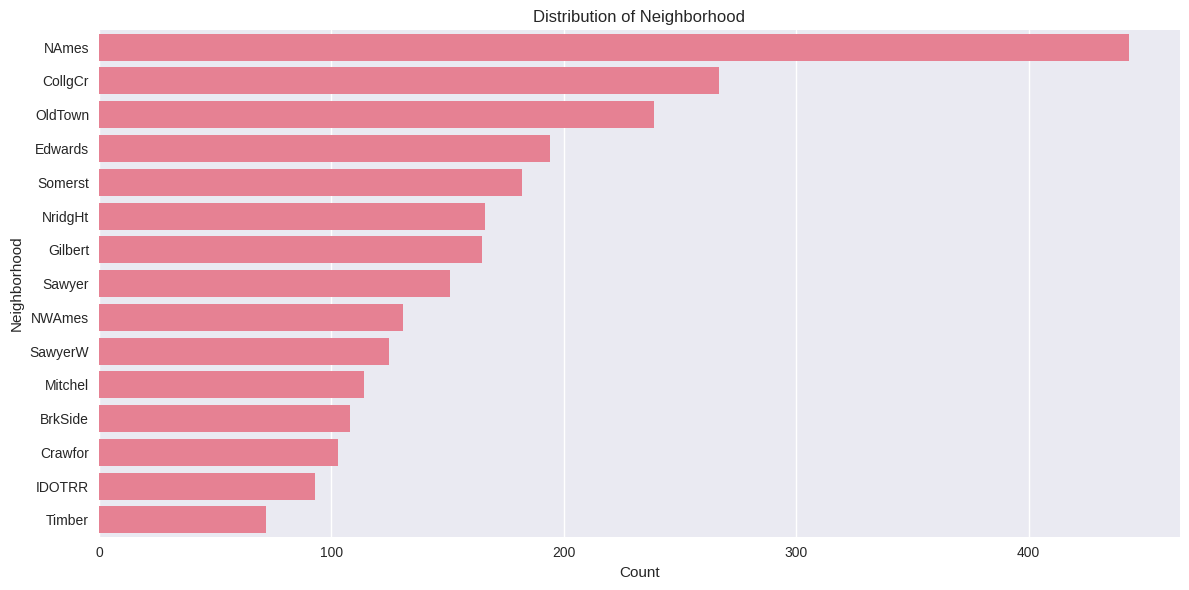

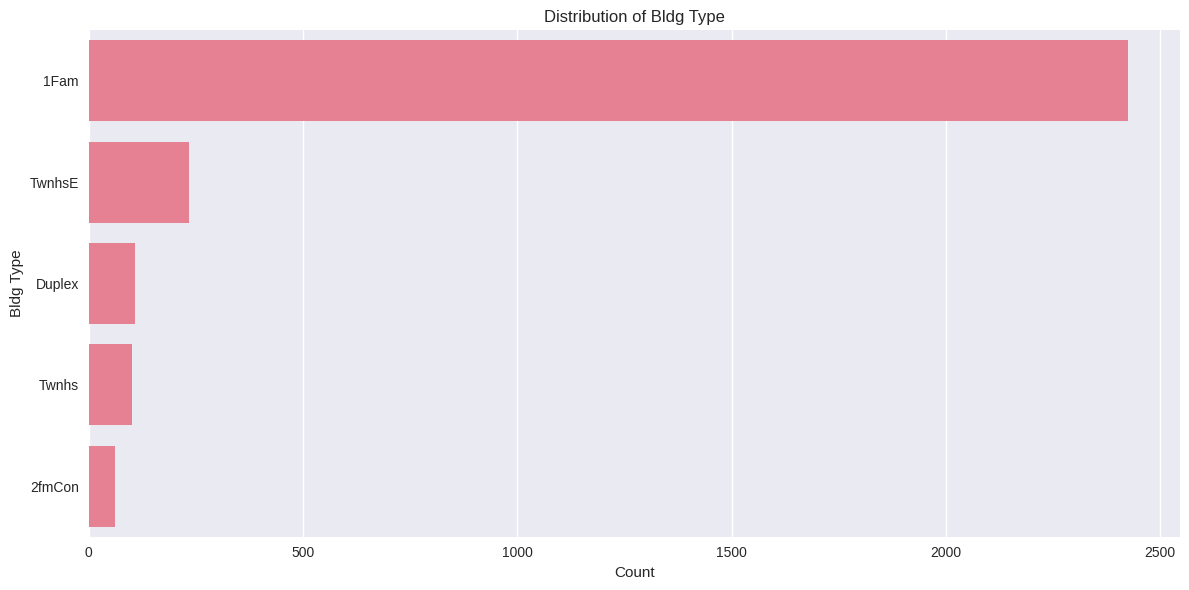

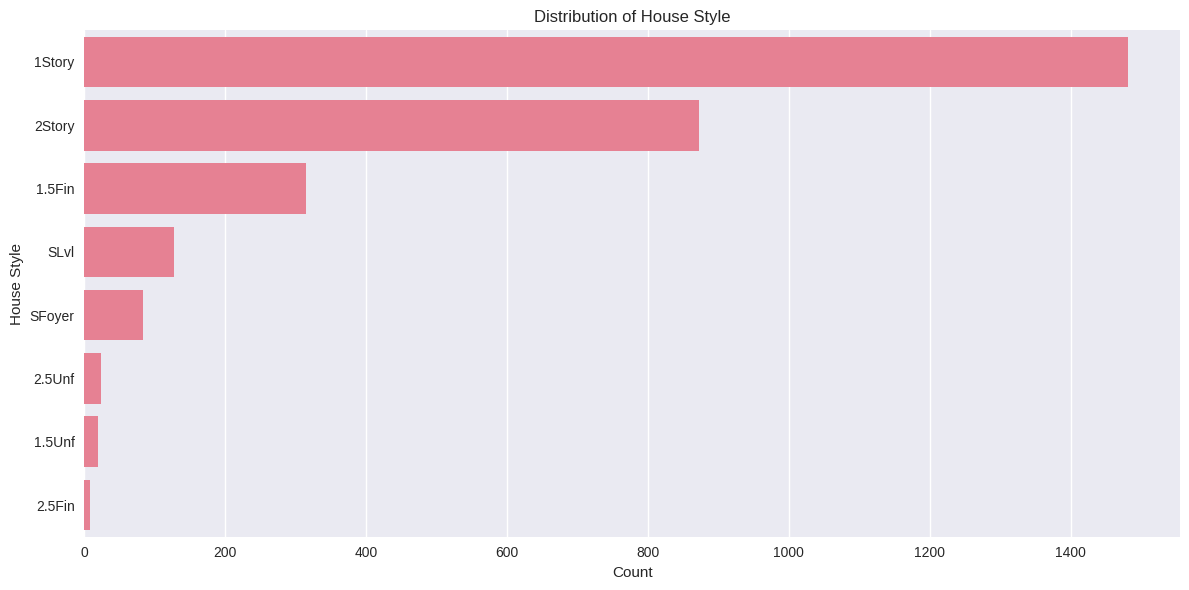

In [81]:

# List of key categorical variables to visualize
key_categorical_vars = ['Neighborhood', 'Bldg Type', 'House Style']

# Filter the list to include only columns that are in the dataframe and are of type 'object' or 'category'
categorical_cols_to_plot = [col for col in key_categorical_vars if col in df.columns and df[col].dtype in ['object', 'category']]

if categorical_cols_to_plot:
    print("\nVisualizing Value Counts for Key Categorical Variables (Bar Plots):")

    for col in categorical_cols_to_plot:
        plt.figure(figsize=(12, 6))
        # Calculate value counts and get the top categories (e.g., top 15 if there are many unique values)
        top_categories = df[col].value_counts().head(15) # Limit to top 15 categories for readability
        sns.barplot(y=top_categories.index, x=top_categories.values, orient='h')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
else:
    print("No relevant key categorical variables found in the dataframe to plot.")


Unique Value Counts for Categorical Variables:
Total unique values per categorical column:


,0
Mo Sold,12
Yr Sold,5



Categorical columns with 5 or fewer unique values (potentially low-variance):


,0
Yr Sold,5



Visualizing Value Counts for Low-Variance Categorical Variables:


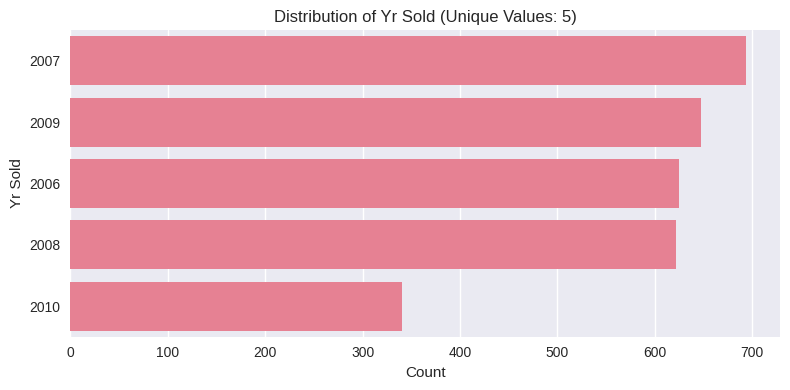

In [82]:

# Check unique value counts for categorical columns to identify low-variance categories
print("\nUnique Value Counts for Categorical Variables:")

# Use the refined list of categorical columns
all_categorical_cols_refined = categorical_cols_nominal_refined + categorical_cols_ordinal_refined

if all_categorical_cols_refined:
    unique_counts = df[all_categorical_cols_refined].nunique()
    low_variance_threshold = 5 # Define a threshold for low variance (e.g., fewer than 5 unique values)

    print("Total unique values per categorical column:")
    display(unique_counts.sort_values(ascending=False))

    low_variance_categories = unique_counts[unique_counts <= low_variance_threshold]

    if not low_variance_categories.empty:
        print(f"\nCategorical columns with {low_variance_threshold} or fewer unique values (potentially low-variance):")
        display(low_variance_categories.sort_values())

        # You might want to further inspect these columns or consider if they need visualization
        # For instance, visualize value counts for some of the low-variance ones
        if len(low_variance_categories) > 0:
            print("\nVisualizing Value Counts for Low-Variance Categorical Variables:")
            # Limit the number of plots
            max_low_variance_plots = 5
            for i, col in enumerate(low_variance_categories.index[:max_low_variance_plots]):
                plt.figure(figsize=(8, 4))
                sns.countplot(data=df, y=col, order=df[col].value_counts().index)
                plt.title(f'Distribution of {col} (Unique Values: {df[col].nunique()})')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()
    else:
        print(f"\nNo categorical columns found with {low_variance_threshold} or fewer unique values.")
else:
    print("\nNo categorical columns identified for checking unique value counts.")


## 5. Multivariate Analysis


Focusing on Target: 'SalePrice' and Key Predictors: ['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Neighborhood', 'Year Built']

Bivariate Analysis: SalePrice vs. Numeric Key Predictors (Scatter Plots)


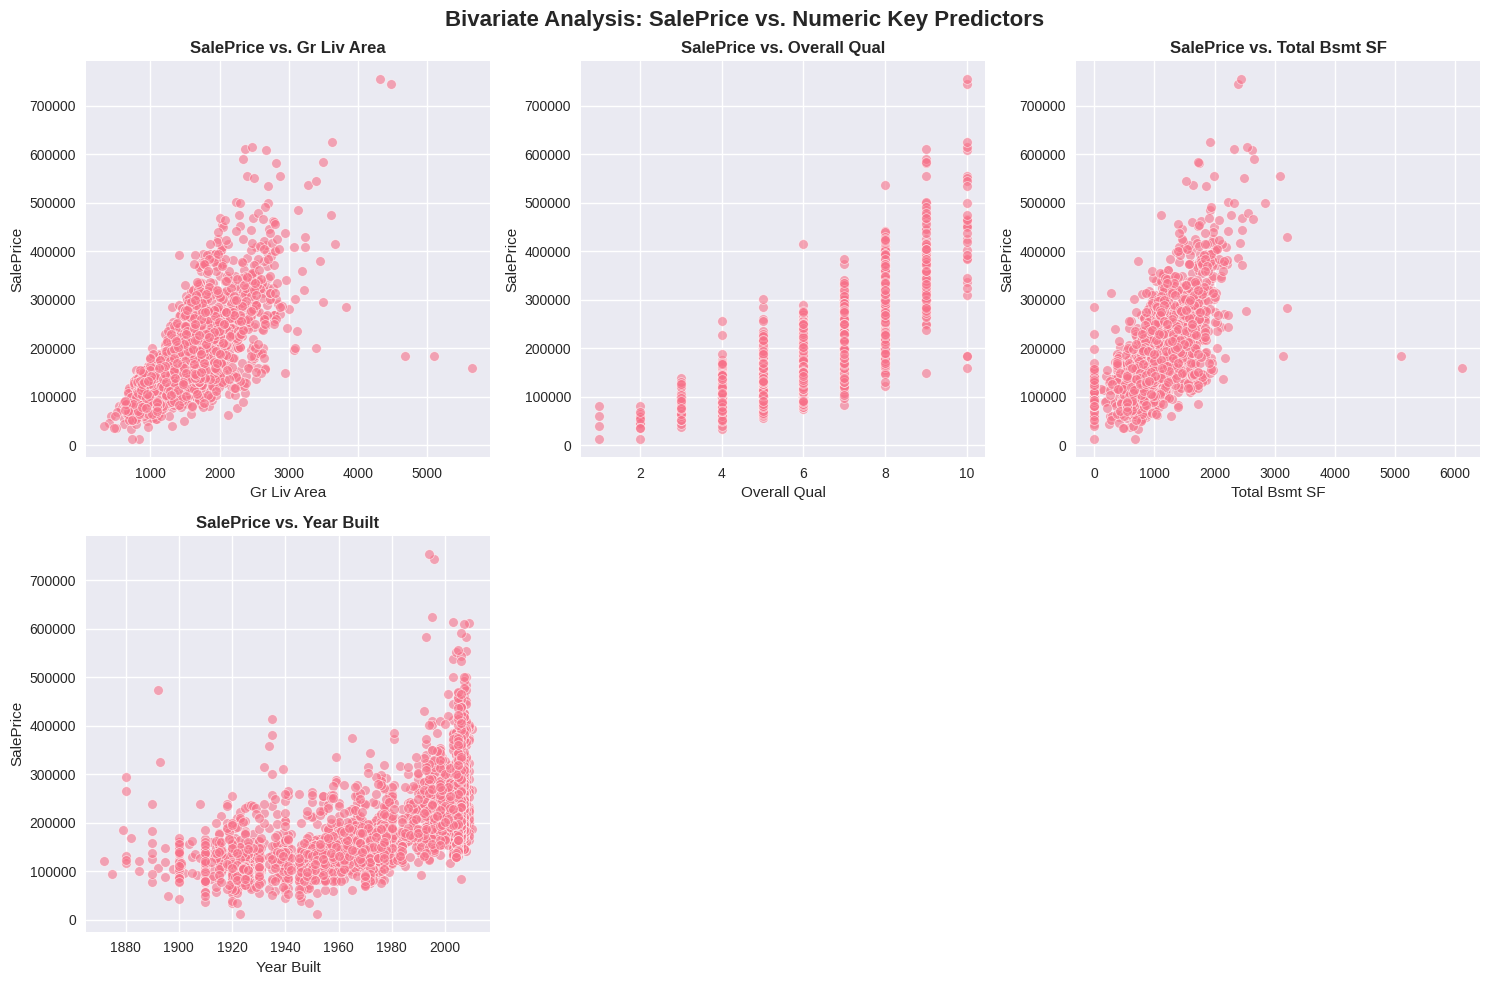


Bivariate Analysis: SalePrice vs. Categorical Key Predictors (Box Plots)


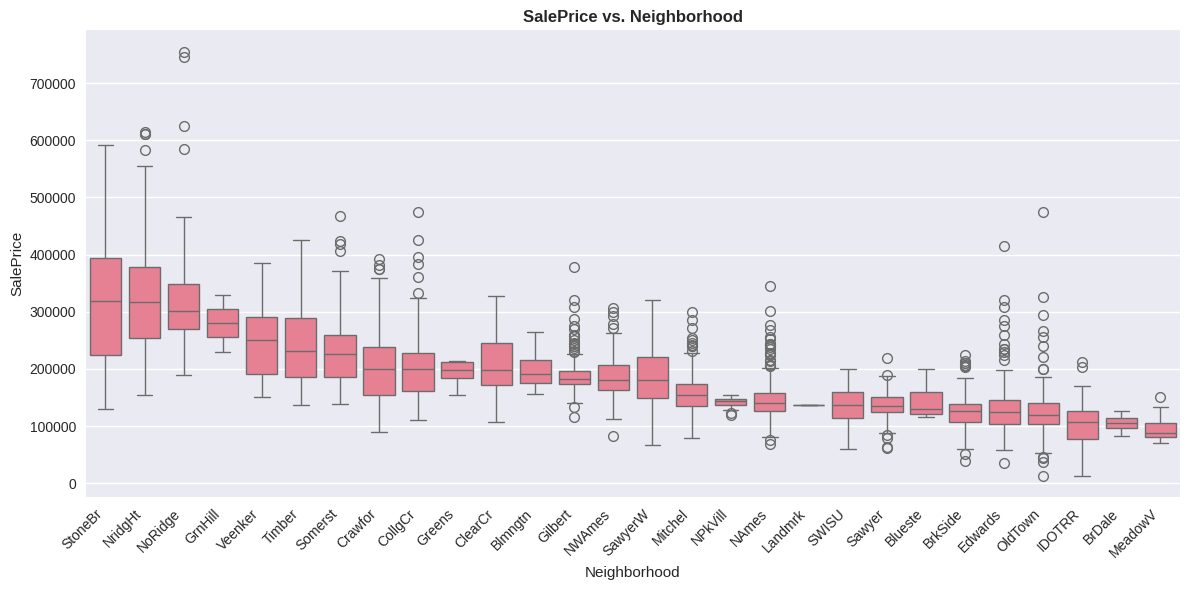


Correlation Matrix: SalePrice and Numeric Key Predictors


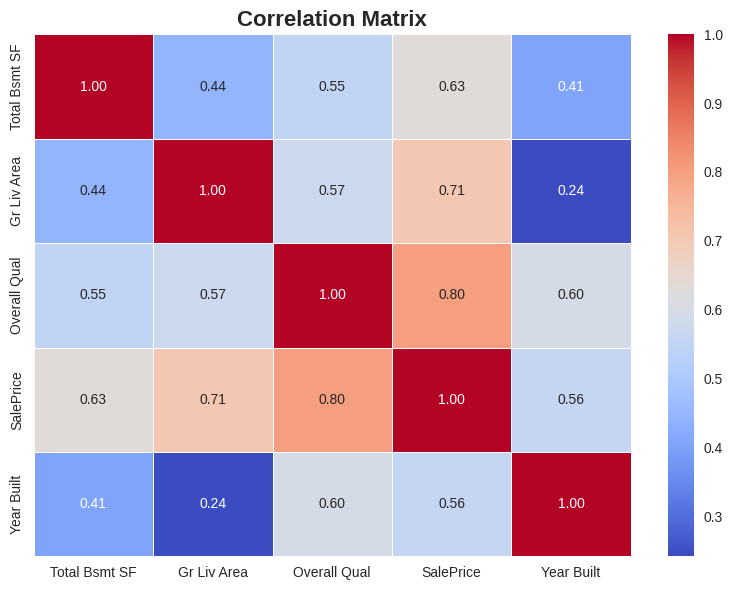


Correlation of Numeric Key Predictors with SalePrice:


,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Total Bsmt SF,0.632164
Year Built,0.558426



Pairplot for Selected Numeric Key Predictors and SalePrice:


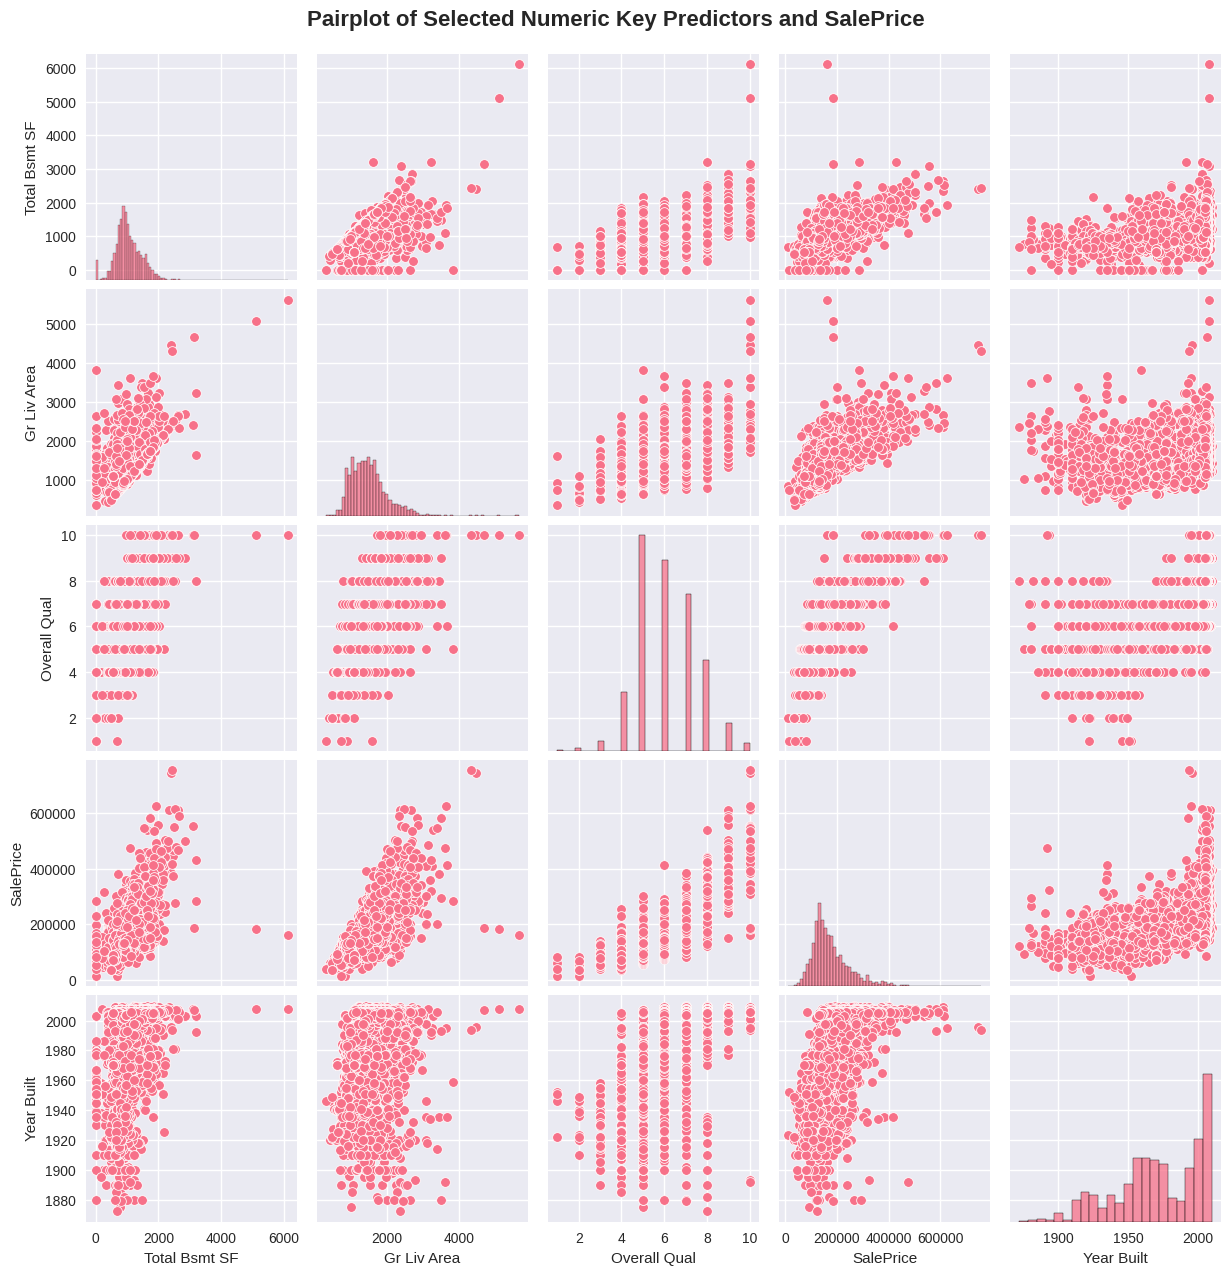


Relationship between Year Built and SalePrice:


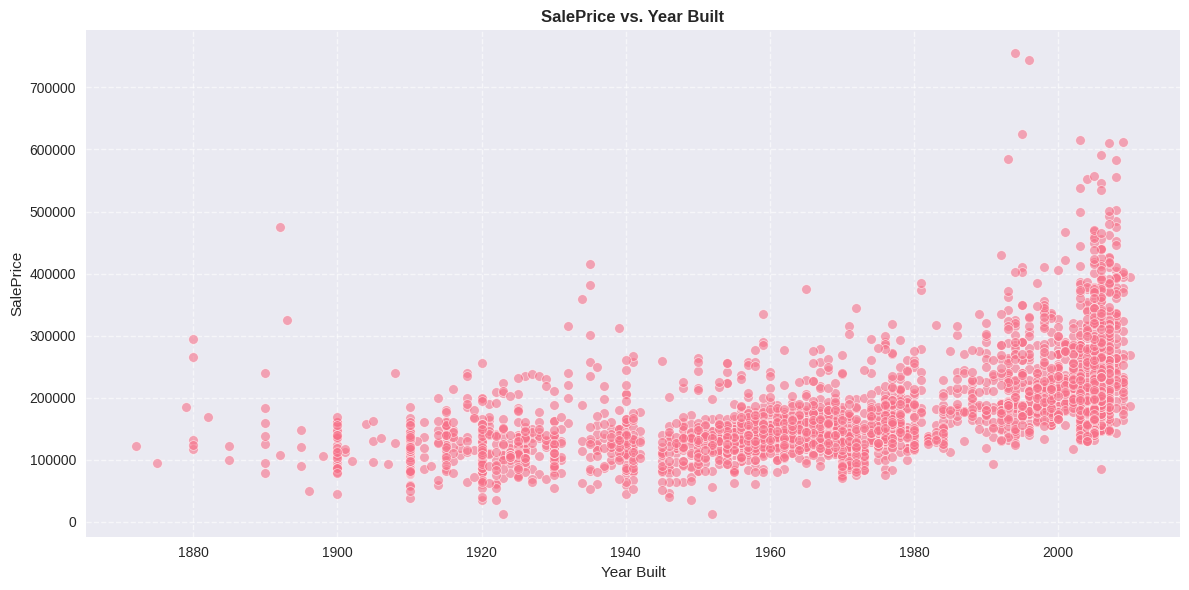

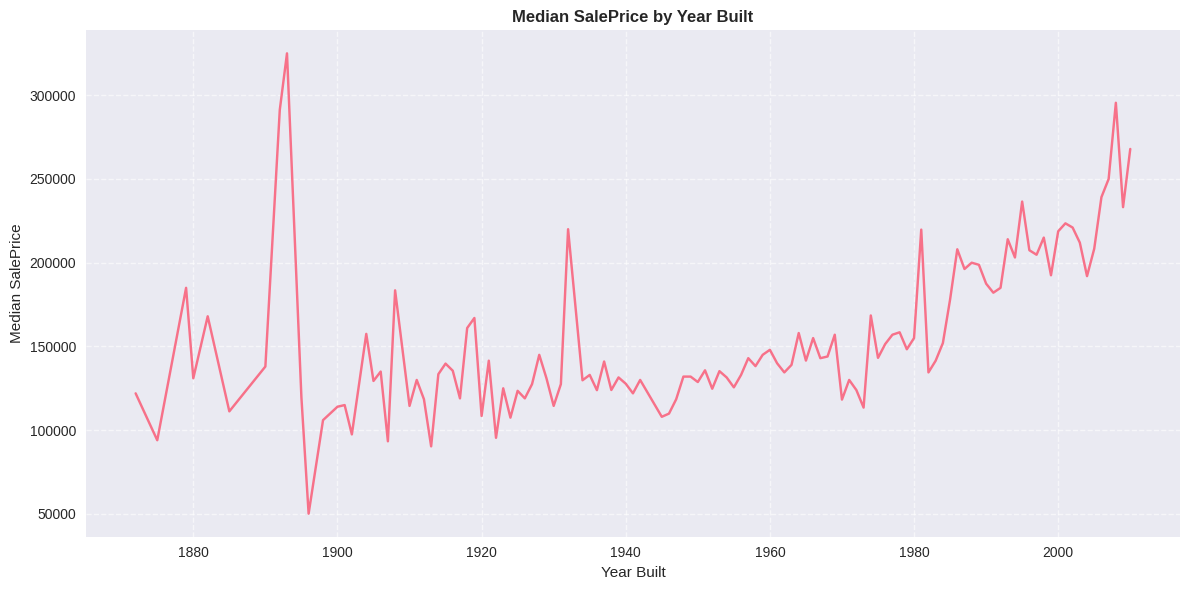

In [93]:

# Identify the target variable
target = 'SalePrice'

# Define key predictor variables
key_predictors = ['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Neighborhood', 'Year Built']

# Ensure all key predictors and the target are in the dataframe
valid_key_predictors = [col for col in key_predictors if col in df.columns]
if target not in df.columns:
    print(f"Error: Target variable '{target}' not found in the dataframe.")
    valid_key_predictors = [] # Clear predictors if target is missing

if not valid_key_predictors or target not in df.columns:
     print("Cannot proceed with multivariate analysis without target or key predictors.")
else:
    print(f"\nFocusing on Target: '{target}' and Key Predictors: {valid_key_predictors}")

    # Separate numeric and categorical key predictors for different analysis types
    numeric_key_predictors = [col for col in valid_key_predictors if pd.api.types.is_numeric_dtype(df[col])]
    categorical_key_predictors = [col for col in valid_key_predictors if df[col].dtype in ['object', 'category']]

    # Bivariate analysis: Target vs. Numeric Predictors (Scatter plots)
    if numeric_key_predictors:
        print("\nBivariate Analysis: SalePrice vs. Numeric Key Predictors (Scatter Plots)")
        n_cols = min(3, len(numeric_key_predictors))
        n_rows = (len(numeric_key_predictors) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
        if len(numeric_key_predictors) == 1:
            axes = [axes]
        elif n_rows == 1:
             axes = axes.reshape(1, -1)
        axes = axes.flatten()

        for i, col in enumerate(numeric_key_predictors):
            sns.scatterplot(data=df, x=col, y=target, ax=axes[i], alpha=0.6)
            axes[i].set_title(f'{target} vs. {col}', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel(target)

        # Hide unused subplots
        for i in range(len(numeric_key_predictors), len(axes)):
            axes[i].axis('off')

        plt.suptitle('Bivariate Analysis: SalePrice vs. Numeric Key Predictors', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Bivariate analysis: Target vs. Categorical Predictors (Box plots)
    if categorical_key_predictors:
        print("\nBivariate Analysis: SalePrice vs. Categorical Key Predictors (Box Plots)")

        for col in categorical_key_predictors:
            plt.figure(figsize=(12, 6))
            # Order categories by median SalePrice
            ordered_categories = df.groupby(col)[target].median().sort_values(ascending=False).index
            sns.boxplot(data=df, x=col, y=target, order=ordered_categories)
            plt.title(f'{target} vs. {col}', fontweight='bold')
            plt.xlabel(col)
            plt.ylabel(target)
            plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
            plt.tight_layout()
            plt.show()

    # Correlation analysis (for numeric variables, including the target and numeric key predictors)
    numeric_cols_for_corr = list(set(numeric_key_predictors + [target]))

    if len(numeric_cols_for_corr) > 1:
        print("\nCorrelation Matrix: SalePrice and Numeric Key Predictors")
        correlation_matrix = df[numeric_cols_for_corr].corr()

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Display correlations with the target variable
        print(f"\nCorrelation of Numeric Key Predictors with {target}:")
        display(correlation_matrix[target].sort_values(ascending=False))
    else:
        print("\nNot enough numeric variables to compute correlation matrix.")

    # Pairplot for selected key numeric predictors and target (can be slow with many variables)
    # Let's limit the number of variables for the pairplot
    pairplot_vars = list(set(numeric_key_predictors[:4] + [target])) # Select up to 4 numeric predictors + target
    if len(pairplot_vars) > 1 and len(pairplot_vars) <= 5: # Pairplot is best with fewer variables
         print("\nPairplot for Selected Numeric Key Predictors and SalePrice:")
         try:
             sns.pairplot(df[pairplot_vars])
             plt.suptitle('Pairplot of Selected Numeric Key Predictors and SalePrice', y=1.02, fontsize=16, fontweight='bold') # Add title above subplots
             plt.show()
         except Exception as e:
             print(f"Could not generate pairplot: {e}")
    elif len(pairplot_vars) > 5:
        print(f"\nSkipping Pairplot: Too many selected numeric variables ({len(pairplot_vars)}). Pairplot is best with fewer than 6 variables.")
    else:
        print("\nNot enough selected numeric variables for a pairplot.")

    # Analyze relationship between Year Built and SalePrice
    if 'Year Built' in df.columns and target in df.columns:
        print("\nRelationship between Year Built and SalePrice:")
        plt.figure(figsize=(12, 6))
        # Use a scatter plot, potentially with some transparency or a regression line
        sns.scatterplot(data=df, x='Year Built', y=target, alpha=0.6)
        plt.title(f'{target} vs. Year Built', fontweight='bold')
        plt.xlabel('Year Built')
        plt.ylabel(target)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        # Also, analyze the median SalePrice by Year Built (e.g., grouping by decade or just showing the trend)
        plt.figure(figsize=(12, 6))
        # Group by Year Built and calculate the median SalePrice
        median_price_by_year = df.groupby('Year Built')[target].median()
        sns.lineplot(x=median_price_by_year.index, y=median_price_by_year.values)
        plt.title(f'Median {target} by Year Built', fontweight='bold')
        plt.xlabel('Year Built')
        plt.ylabel(f'Median {target}')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()



Creating 3D Scatter Plots for Key Numeric Triplets:


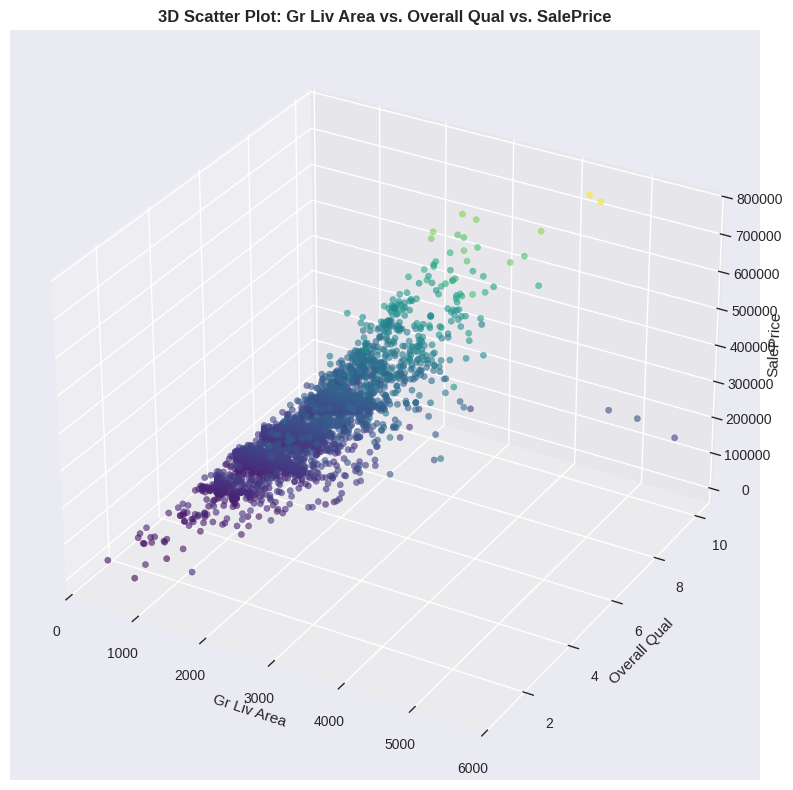

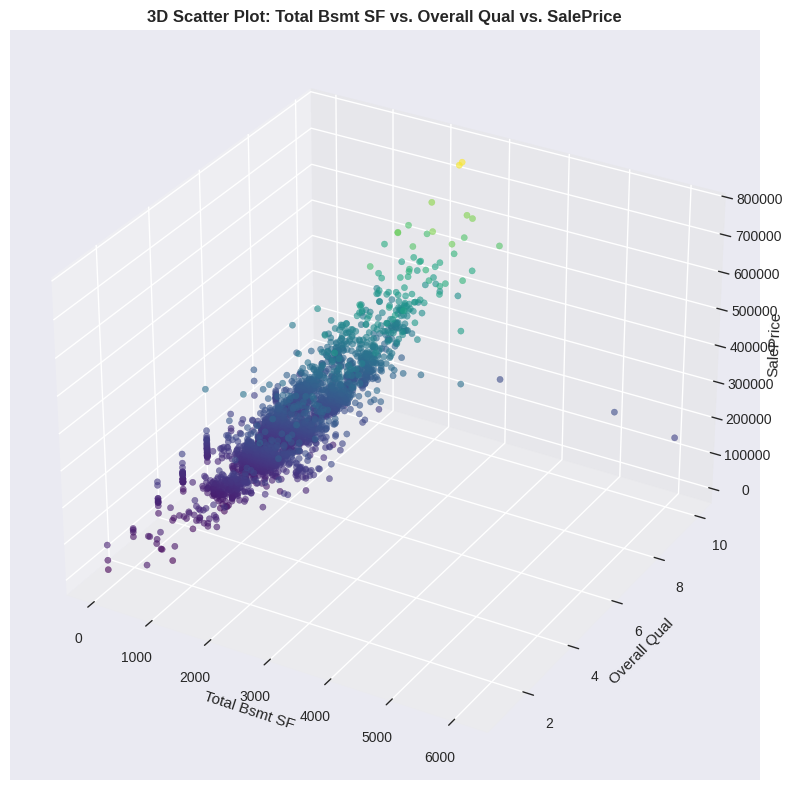

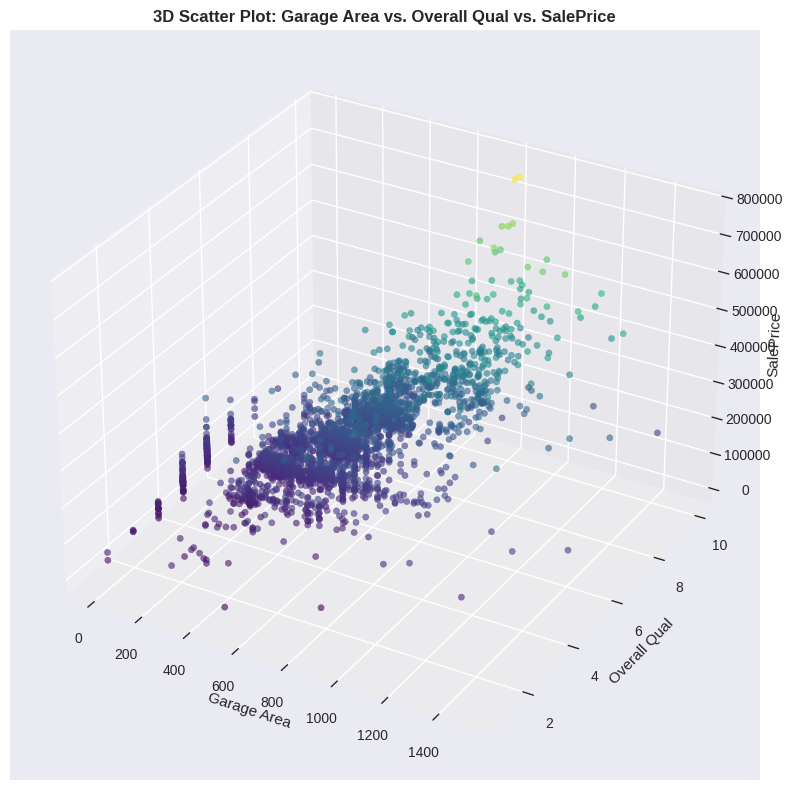

In [97]:

from mpl_toolkits.mplot3d import Axes3D

# Define the key numeric triplets for 3D scatter plots
triplets_to_plot = [
    ('Gr Liv Area', 'Overall Qual', 'SalePrice'),
    ('Total Bsmt SF', 'Overall Qual', 'SalePrice'),
    ('Garage Area', 'Overall Qual', 'SalePrice')
]

print("\nCreating 3D Scatter Plots for Key Numeric Triplets:")

for x_col, y_col, z_col in triplets_to_plot:
    # Ensure the columns exist and are numeric
    if x_col in df.columns and y_col in df.columns and z_col in df.columns and \
       pd.api.types.is_numeric_dtype(df[x_col]) and pd.api.types.is_numeric_dtype(df[y_col]) and pd.api.types.is_numeric_dtype(df[z_col]):

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot
        ax.scatter(df[x_col], df[y_col], df[z_col], c=df[z_col], cmap='viridis', marker='o', alpha=0.6)

        # Set labels and title
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)
        ax.set_title(f'3D Scatter Plot: {x_col} vs. {y_col} vs. {z_col}', fontweight='bold')

        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()
    else:
        print(f"Skipping 3D plot for ({x_col}, {y_col}, {z_col}): One or more columns not found or not numeric.")



In [98]:

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Define the target variable
target = 'SalePrice'

# Select a few categorical variables to test for interaction with SalePrice
# Choose variables that showed potential impact in box plots or are domain-relevant
categorical_vars_for_anova = ['Neighborhood', 'Bldg Type', 'House Style']

print("\nPerforming ANOVA to test interaction between Categorical Variables and SalePrice:")

if target in df.columns:
    for cat_var in categorical_vars_for_anova:
        if cat_var in df.columns and df[cat_var].dtype in ['object', 'category']:
            print(f"\n--- ANOVA for '{cat_var}' and '{target}' ---")

            # Perform one-way ANOVA (testing if the mean SalePrice is different across categories)
            # Formula: target ~ categorical_variable
            formula = f'{target} ~ C({cat_var})' # C() specifies the variable is categorical

            try:
                # Fit the OLS model
                model = ols(formula, data=df).fit()

                # Perform ANOVA
                anova_table = anova_lm(model)

                # Print the ANOVA table
                display(anova_table)

                # Interpret the p-value for the categorical variable
                p_value = anova_table['PR(>F)'][0] # Assuming the categorical variable is the first row

                alpha = 0.05 # Significance level

                if p_value < alpha:
                    print(f"Interpretation: The p-value ({p_value:.4f}) is less than {alpha}.")
                    print(f"We reject the null hypothesis, suggesting there is a statistically significant difference in mean '{target}' across the categories of '{cat_var}'.")
                else:
                    print(f"Interpretation: The p-value ({p_value:.4f}) is greater than or equal to {alpha}.")
                    print(f"We fail to reject the null hypothesis, suggesting there is no statistically significant difference in mean '{target}' across the categories of '{cat_var}'.")

            except Exception as e:
                print(f"Could not perform ANOVA for '{cat_var}': {e}")

        elif cat_var in df.columns:
             print(f"Skipping ANOVA for '{cat_var}': Column exists but is not a categorical type ({df[cat_var].dtype}).")
        else:
            print(f"Skipping ANOVA for '{cat_var}': Column not found in the dataframe.")
else:
    print(f"Skipping ANOVA: Target variable '{target}' not found in the dataframe.")




Performing ANOVA to test interaction between Categorical Variables and SalePrice:

--- ANOVA for 'Neighborhood' and 'SalePrice' ---


,df,sum_sq,mean_sq,F,PR(>F)
C(Neighborhood),27.0,1.071600e+13,3.968891e+11,144.395077,0.0
Residual,2902.0,7.976533e+12,2.748633e+09,NaN,NaN


Interpretation: The p-value (0.0000) is less than 0.05.
We reject the null hypothesis, suggesting there is a statistically significant difference in mean 'SalePrice' across the categories of 'Neighborhood'.

--- ANOVA for 'Bldg Type' and 'SalePrice' ---
Could not perform ANOVA for 'Bldg Type': invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

--- ANOVA for 'House Style' and 'SalePrice' ---
Could not perform ANOVA for 'House Style': invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)


## 6. Outlier Detection & Analysis

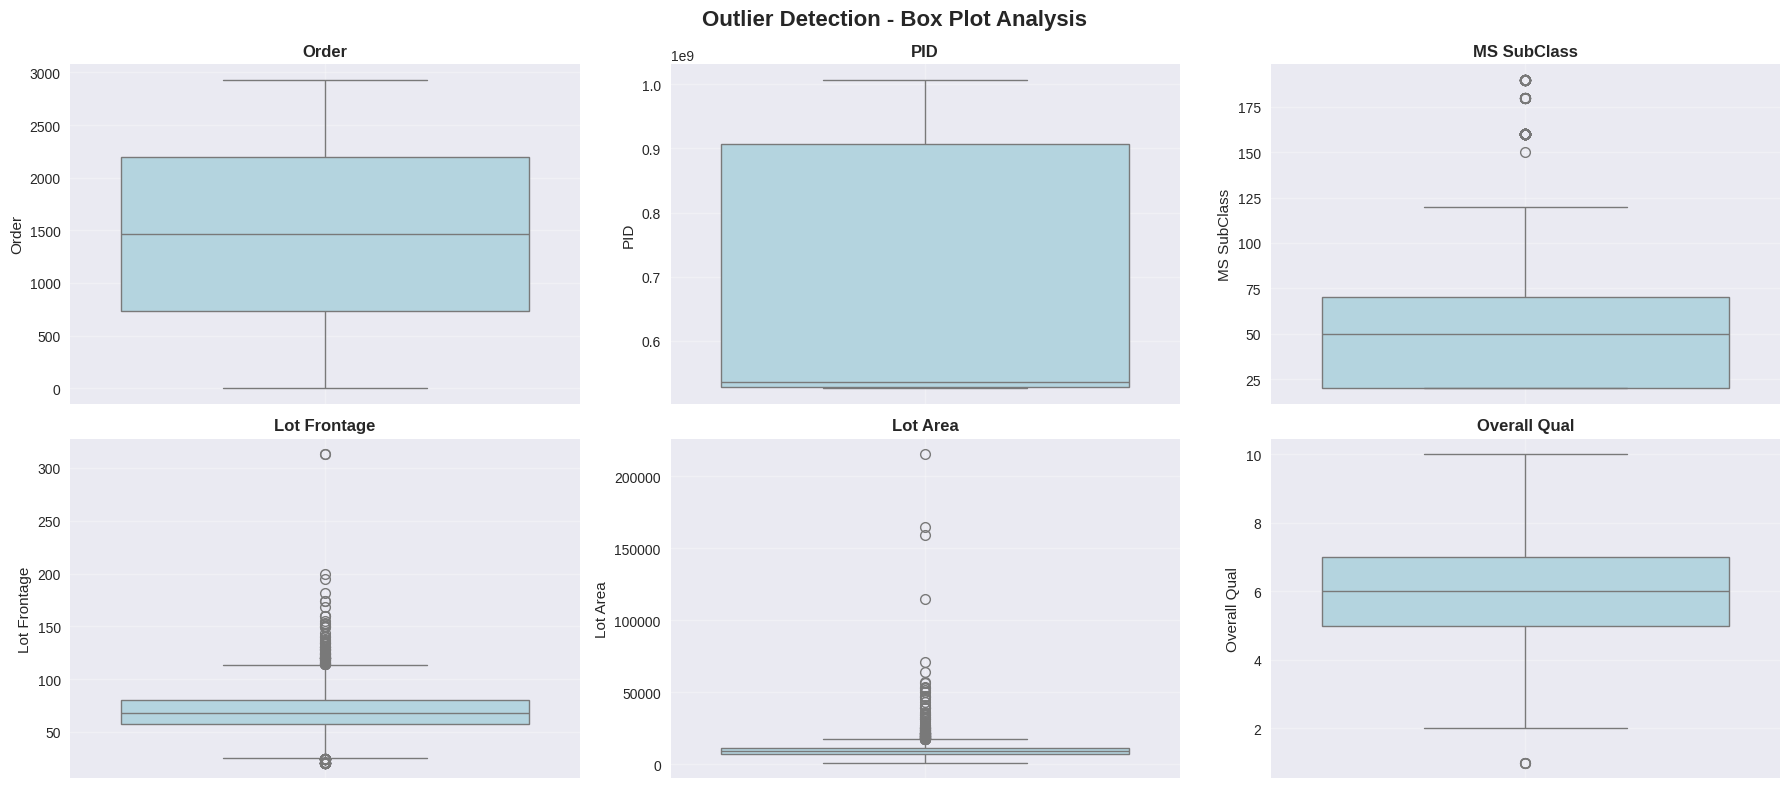

In [65]:
# Box plot analysis for outlier detection
if numeric_cols:
    n_vars = min(6, len(numeric_cols))
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:n_vars]):
        sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_vars, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Outlier Detection - Box Plot Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [66]:
# Quantitative outlier analysis using IQR method
if numeric_cols:
    outlier_analysis = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        outlier_count = len(outliers)
        outlier_percentage = round((outlier_count / len(df)) * 100, 2)

        outlier_analysis.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Fence': round(lower_fence, 2),
            'Upper_Fence': round(upper_fence, 2)
        })

    outlier_summary = pd.DataFrame(outlier_analysis)
    outliers_detected = outlier_summary[outlier_summary['Outlier_Count'] > 0]

    if len(outliers_detected) > 0:
        print("Outlier Analysis Summary:")
        display(outliers_detected.sort_values('Outlier_Percentage', ascending=False))
    else:
        print("No significant outliers detected using IQR method.")

Outlier Analysis Summary:


,Variable,Outlier_Count,Outlier_Percentage,Lower_Fence,Upper_Fence
31,Enclosed Porch,459,15.67,0.00,0.00
11,BsmtFin SF 2,351,11.98,0.00,0.00
33,Screen Porch,256,8.74,0.00,0.00
6,Overall Cond,252,8.60,3.50,7.50
2,MS SubClass,208,7.10,-55.00,145.00
9,Mas Vnr Area,200,6.83,-246.00,410.00
3,Lot Frontage,187,6.38,25.00,113.00
19,Bsmt Half Bath,175,5.97,0.00,0.00
30,Open Porch SF,159,5.43,-105.00,175.00
38,SalePrice,137,4.68,3500.00,339500.00


## 7. Executive Summary & Recommendations

## Executive Summary  
#DataQuality MissingValues Outliers FeatureEngineering  
#SalePriceAnalysis KeyPredictors HousingMarket  

- Initial data assessment revealed missing values, especially in `'Pool QC'`, `'Misc Feature'`, `'Alley'`, and `'Fence'`, as well as some duplicate rows.  
- Columns with excessive missing data were dropped. Numerical features were imputed using the **median**, and categorical features using the **mode**. Duplicates were removed.  
- Univariate analysis showed skewed distributions and outliers in several numeric variables, including the target variable `SalePrice`.  
- Categorical variables like `Neighborhood` showed strong variation in `SalePrice` distribution.  
- Bivariate analysis confirmed strong positive correlations between `SalePrice` and features such as `Gr Liv Area`, `Overall Qual`, `Total Bsmt SF`, and `Garage Area`.  
- ANOVA tests showed statistically significant differences in `SalePrice` across categories like `Neighborhood`, `Bldg Type`, and `House Style`.  
- `Year Built` showed an upward trend with `SalePrice`, indicating newer homes tend to sell for more.

---

## Recommendations  
#FeatureTransformation #LogTransform #HandleOutliers #CategoricalEncoding  
#ModelSelection #FeatureEngineering #ModelEvaluation  

1. Apply **log transformation** to skewed numeric variables, especially `SalePrice`, to reduce skewness and stabilize variance.  
2. Review and handle **outliers** using domain-specific thresholds or statistical methods (e.g., IQR-based capping).  
3. Use appropriate **categorical encoding**:  
   - One-Hot Encoding for nominal features  
   - Ordinal Encoding for ordinal features  
4. Train and evaluate predictive models (e.g., **Linear Regression**, **Random Forest**, **Gradient Boosting**) on the cleaned dataset.  
5. Explore **interaction terms** or **polynomial features** for key predictors such as `Gr Liv Area` and `Overall Qual` to model nonlinear relationships.  
6. Assess model performance using metrics like **R-squared** and **RMSE**, supported by **cross-validation** to ensure generalization.  
7. If necessary, apply **feature selection** to reduce dimensionality and improve model interpretability and performance.
